# Categorizing and Tagging Words

The goal of this chapter is to answer the following questions:

1) What are lexical categories and how are they used in natural language processing?
2) What is a good Python data structure for storing words and their categories?
3) How can we automatically tag each word of a text with its word class?

Along the way, we'll cover some fundamental techniques in NLP, including sequence labeling, n-gram models, backoff, and evaluation. These techniques are useful in many areas, and tagging gives us a simple context in which to present them. We will also see how tagging is the second step in the typical NLP pipeline, following tokenization.

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS-tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. Our emphasis in this chapter is on exploiting tags, and tagging text automatically.

# 1 Using a Tagger

A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word (don't
forget to import nltk):

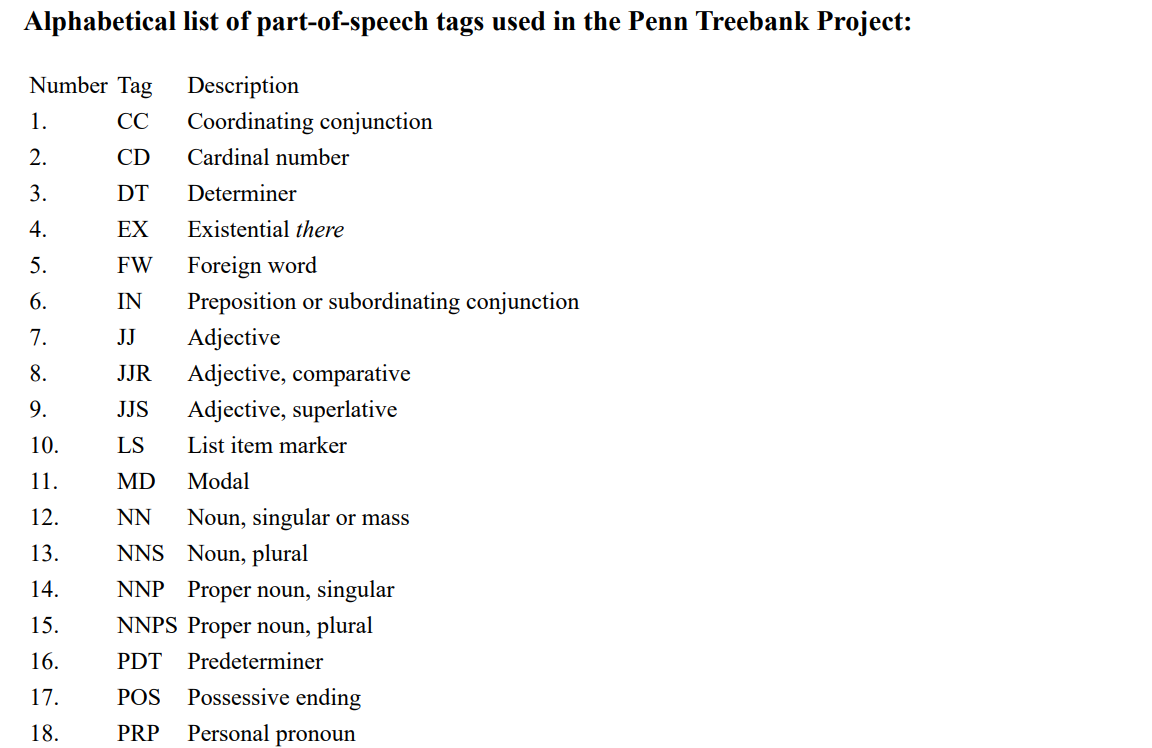

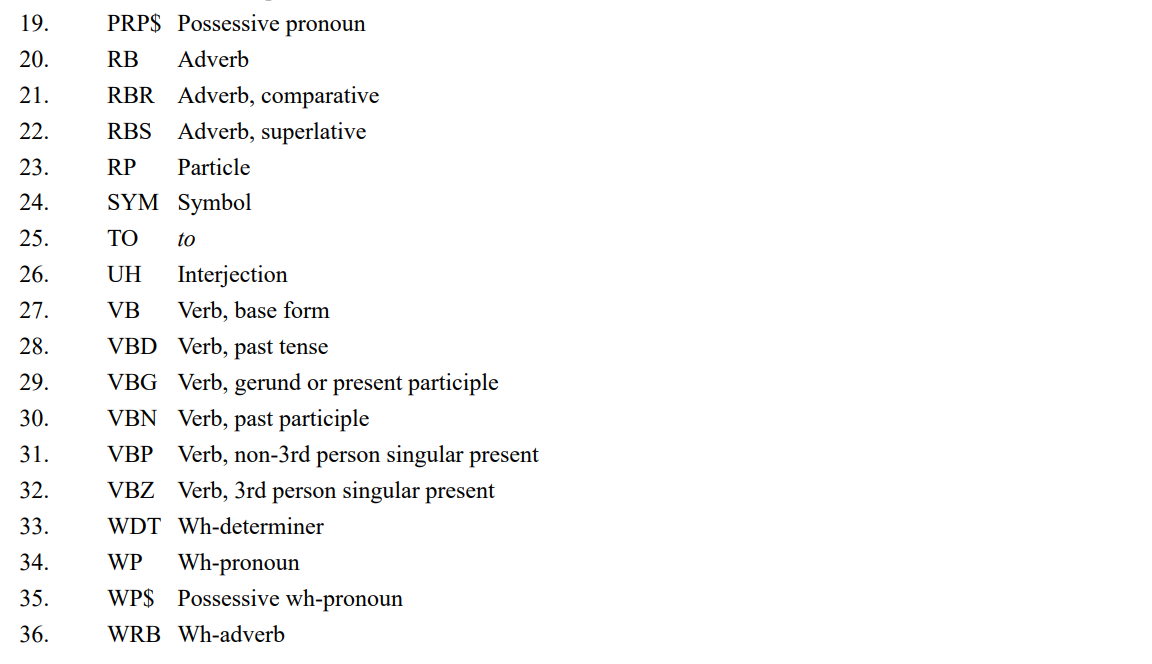

In [70]:
import nltk
from nltk import word_tokenize
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)


[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

**Detailed Explanation:**

Let's break down the provided code step by step:

1. **Importing the nltk library:**
   ```python
   import nltk
   ```
   This line imports the Natural Language Toolkit library (`nltk`) in Python.

2. **Importing the word_tokenize function:**
   ```python
   from nltk import word_tokenize
   ```
   This line specifically imports the `word_tokenize` function from nltk. `word_tokenize` is used to split a text into words.

3. **Tokenizing the text:**
   ```python
   text = word_tokenize("And now for something completely different")
   ```
   The `word_tokenize` function is applied to the input text, "And now for something completely different," and the result is assigned to the variable `text`. `text` will be a list of words obtained by tokenizing the input text.

4. **Performing Part-of-Speech (POS) tagging:**
   ```python
   nltk.pos_tag(text)
   ```
   The `pos_tag` function from nltk is used to perform Part-of-Speech tagging on the list of words (`text`). It assigns a POS tag to each word in the list. The result is a list of tuples where each tuple contains a word and its corresponding POS tag.

Putting it all together:

```python
import nltk
from nltk import word_tokenize

# Tokenize the text
text = word_tokenize("And now for something completely different")

# Perform Part-of-Speech tagging
pos_tags = nltk.pos_tag(text)

# Display the result
print(pos_tags)
```

After running this code, `pos_tags` will contain a list of tuples where each tuple consists of a word and its associated POS tag. The output will look something like:

```python
[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]
```

Each tuple has a word and its corresponding POS tag. The POS tags follow the Penn Treebank POS Tagset conventions. For example, 'CC' is a coordinating conjunction, 'RB' is an adverb, 'IN' is a preposition, 'NN' is a singular noun, and 'JJ' is an adjective.

Here we see that and is CC, a coordinating conjunction; now and completely are RB, or adverbs; for is IN, a preposition; something is NN, a noun; and different is JJ, an adjective.

Let's look at another example, this time including some homonyms:


In [71]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)


[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

**Detailed Explanation:**

Let's break down the provided code step by step:

1. **Tokenizing the text:**
   ```python
   text = word_tokenize("They refuse to permit us to obtain the refuse permit")
   ```
   The `word_tokenize` function is applied to the input text, "They refuse to permit us to obtain the refuse permit," and the result is assigned to the variable `text`. `text` will be a list of words obtained by tokenizing the input text.

2. **Performing Part-of-Speech (POS) tagging:**
   ```python
   nltk.pos_tag(text)
   ```
   The `pos_tag` function from nltk is used to perform Part-of-Speech tagging on the list of words (`text`). It assigns a POS tag to each word in the list. The result is a list of tuples where each tuple contains a word and its corresponding POS tag.

Putting it all together:

```python
from nltk import word_tokenize
import nltk

# Tokenize the text
text = word_tokenize("They refuse to permit us to obtain the refuse permit")

# Perform Part-of-Speech tagging
pos_tags = nltk.pos_tag(text)

# Display the result
print(pos_tags)
```

After running this code, `pos_tags` will contain a list of tuples where each tuple consists of a word and its associated POS tag. The output will look something like:

```python
[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]
```

Each tuple has a word and its corresponding POS tag. The POS tags follow the Penn Treebank POS Tagset conventions. For example, 'PRP' is a personal pronoun, 'VBP' is a verb (non-3rd person singular present), 'TO' is the infinitival "to," 'VB' is a verb (base form), and 'NN' is a singular noun.

Notice that refuse and permit both appear as a present tense verb (VBP) and a noun (NN). E.g. refUSE is a verb meaning "deny,"
while REFuse is a noun meaning "trash" (i.e. they are not homophones). Thus, we need to know which word is being used in
order to pronounce the text correctly. (For this reason, text-to-speech systems usually perform POS-tagging.)

Let's see which of these tags are the most common in the news category of the Brown corpus:


In [72]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

**Detailed Explanation:**

Let's break down the provided code step by step:

1. **Importing necessary libraries and modules:**
   ```python
   from nltk.corpus import brown
   ```
   This line imports the Brown Corpus from the Natural Language Toolkit (nltk) library.

2. **Retrieving tagged words from the 'news' category of the Brown Corpus:**
   ```python
   brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
   ```
   This line retrieves tagged words from the 'news' category of the Brown Corpus. The `tagged_words` function is used with the 'universal' tagset, which represents a simplified, cross-linguistic set of POS (Part of Speech) tags.

3. **Creating a frequency distribution of POS tags:**
   ```python
   tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
   ```
   This line creates a frequency distribution (`tag_fd`) of POS tags from the tagged words. It uses a generator expression to iterate through the `(word, tag)` pairs and extracts the POS tags.

4. **Finding the most common POS tags:**
   ```python
   tag_fd.most_common()
   ```
   This line calls the `most_common()` method on the frequency distribution to retrieve a list of tuples representing the most common POS tags and their frequencies.

Putting it all together:

```python
from nltk.corpus import brown
import nltk

# Retrieve tagged words from the 'news' category of the Brown Corpus with the 'universal' tagset
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

# Create a frequency distribution of POS tags
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)

# Display the most common POS tags and their frequencies
print(tag_fd.most_common())
```

After running this code, the output will be a list of tuples where each tuple contains a POS tag and its frequency in the 'news' category of the Brown Corpus. The result provides insights into the distribution of POS tags in the given text corpus.

Lexical categories like "noun" and part-of-speech tags like NN seem to have their uses, but the details will be obscure to many
readers. You might wonder what justification there is for introducing this extra level of information. Many of these categories
arise from superficial analysis the distribution of words in text. Consider the following analysis involving woman (a noun),
bought (a verb), over (a preposition), and the (a determiner). The text.similar() method takes a word w, finds all contexts w1w
w2
, then finds all words w' that appear in the same context, i.e. w1w'w2
.


In [74]:
 text.similar('bought')


made said done put had seen found given left heard was been brought
set got that took in told felt


In [75]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [76]:
text.similar('the')


a his this their its her an that our any all one these my in your no
some other and


Note:

Observe that searching for woman finds nouns; searching for bought mostly finds verbs; searching for over generally finds
prepositions; searching for the finds several determiners. A tagger can correctly identify the tags on these words in the context of
a sentence, e.g. The woman bought over $150,000 worth of clothes.


A tagger can also model our knowledge of unknown words, e.g. we can guess that scrobbling is probably a verb, with the root
scrobble, and likely to occur in contexts like he was scrobbling.

# 2 Tagged Corpora


# 2.1 Representing Tagged Tokens
By convention in NLTK, a tagged token is represented using a tuple consisting of the token and the tag. We can create one of
these special tuples from the standard string representation of a tagged token, using the function str2tuple():

In [77]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token


('fly', 'NN')

In [78]:
tagged_token[0]


'fly'

In [79]:
tagged_token[1]

'NN'

We can construct a list of tagged tokens directly from a string. The first step is to tokenize the string to access the individual
word/tag strings, and then to convert each of these into a tuple (using str2tuple()).


In [80]:
sent = '''
... The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
... other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
... Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
... said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
... accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
... interest/NN of/IN both/ABX governments/NNS ''/'' ./.
... '''
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Creating a string representing a tagged sentence:**
   ```python
   sent = '''
   The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
   other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
   Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
   said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
   accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
   interest/NN of/IN both/ABX governments/NNS ''/'' ./.
   '''
   ```
   This variable `sent` contains a multi-line string representing a tagged sentence where each word is followed by its POS (Part of Speech) tag, separated by a forward slash.

2. **Splitting the string and converting to tuple format:**
   ```python
   [nltk.tag.str2tuple(t) for t in sent.split()]
   ```
   This line splits the multi-line string into a list of strings using the `split()` method. Each string represents a word and its corresponding POS tag. Then, the list comprehension `nltk.tag.str2tuple(t)` is used to convert each string into a tuple in the format `(word, tag)`.

Putting it all together:

```python
import nltk

# Creating a string representing a tagged sentence
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''

# Splitting the string and converting to tuple format
tagged_words = [nltk.tag.str2tuple(t) for t in sent.split()]

# Display the result
print(tagged_words)
```

After running this code, `tagged_words` will be a list of tuples, where each tuple contains a word and its corresponding POS tag extracted from the provided tagged sentence. The output will look something like:

```python
[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ...]
```

Each tuple represents a word and its POS tag in the sentence.

# 2.2 Reading Tagged Corpora

Several of the corpora included with NLTK have been tagged for their part-of-speech. Here's an example of what you might see
if you opened a file from the Brown Corpus with a text editor:
The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$
recent/jj primary/nn election/nn produced/vbd / no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd
place/nn ./.
Other corpora use a variety of formats for storing part-of-speech tags. NLTK's corpus readers provide a uniform interface so that
you don't have to be concerned with the different file formats. In contrast with the file fragment shown above, the corpus reader
for the Brown Corpus represents the data as shown below. Note that part-of-speech tags have been converted to uppercase, since
this has become standard practice since the Brown Corpus was published.



In [81]:
nltk.corpus.brown.tagged_words()


[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [82]:
nltk.corpus.brown.tagged_words(tagset='universal')


[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Whenever a corpus contains tagged text, the NLTK corpus interface will have a tagged_words() method. Here are some more
examples, again using the output format illustrated for the Brown Corpus:


In [83]:
print(nltk.corpus.nps_chat.tagged_words())


[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [84]:
nltk.corpus.conll2000.tagged_words()


[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [85]:
nltk.corpus.treebank.tagged_words()


[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

Tagged corpora for several other languages are distributed with NLTK, including Chinese, Hindi, Portuguese, Spanish, Dutch
and Catalan. These usually contain non-ASCII text, and Python always displays this in hexadecimal when printing a larger
structure such as a list.

In [86]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [87]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [88]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [89]:
nltk.corpus.conll2002.tagged_words()


[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [90]:
 nltk.corpus.cess_cat.tagged_words()


[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

# 2.3 Nouns
Nouns generally refer to people, places, things, or concepts, e.g.: woman, Scotland, book, intelligence. Nouns can appear after
determiners and adjectives, and can be the subject or object of the verb, as shown below:

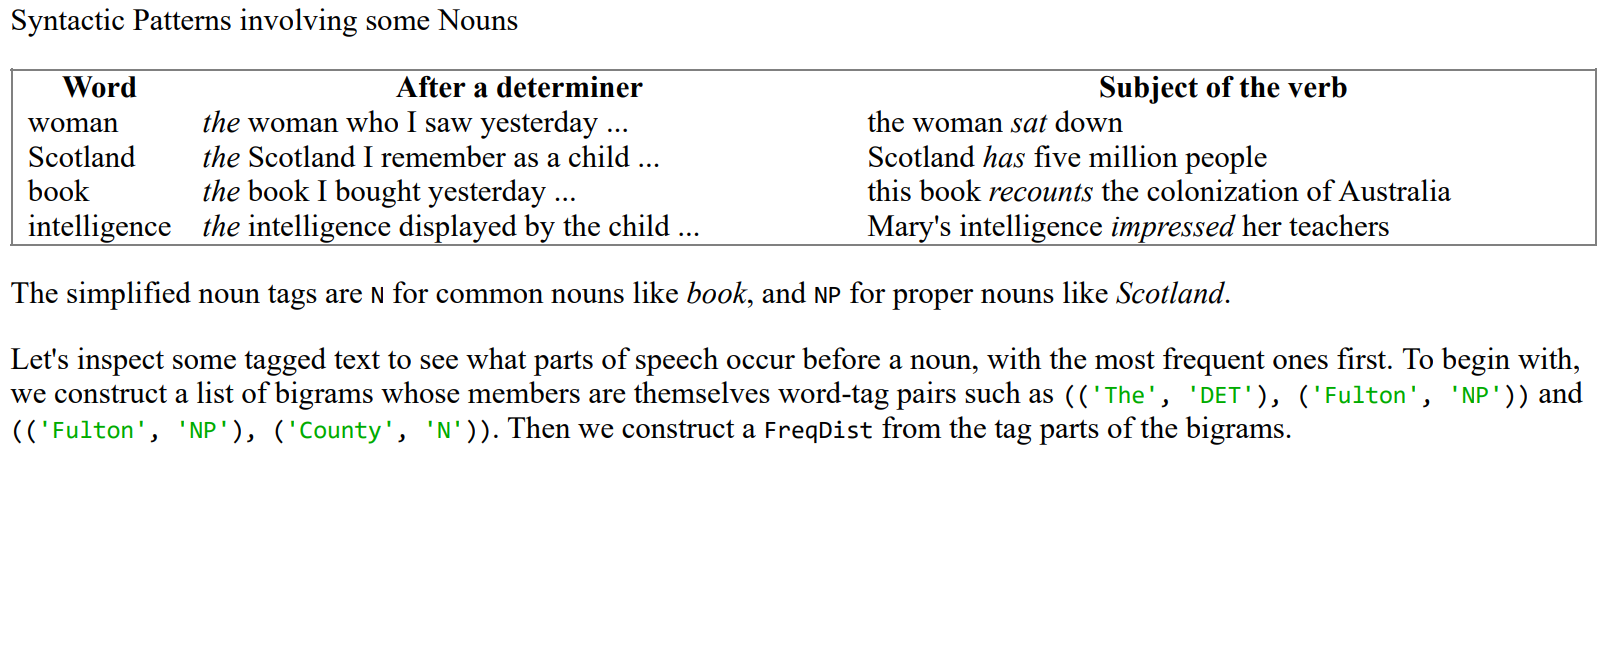


In [91]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

**Detailed Explanation:**

This code snippet uses the Natural Language Toolkit (nltk) library in Python to analyze the Brown Corpus, specifically focusing on tagged words in the "news" category. The code aims to identify the parts-of-speech tags that most commonly precede nouns. Let's break down the code:

```python
import nltk

# Assuming that brown_news_tagged is a pre-tagged version of the Brown Corpus in the "news" category

# Create bigrams of word-tag pairs
word_tag_pairs = nltk.bigrams(brown_news_tagged)

# Extract parts-of-speech tags that precede nouns
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']

# Create a frequency distribution of the noun preceders
fdist = nltk.FreqDist(noun_preceders)

# Extract and display the most common parts-of-speech tags preceding nouns
[tag for (tag, _) in fdist.most_common()]
```

Explanation:

1. **Importing the nltk library:**
   ```python
   import nltk
   ```
   This line imports the Natural Language Toolkit library.

2. **Creating bigrams of word-tag pairs:**
   ```python
   word_tag_pairs = nltk.bigrams(brown_news_tagged)
   ```
   The `nltk.bigrams()` function generates bigrams (pairs of consecutive elements) from the provided list, which in this case is assumed to be a pre-tagged version of the Brown Corpus in the "news" category (`brown_news_tagged`).

3. **Extracting parts-of-speech tags that precede nouns:**
   ```python
   noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
   ```
   The list comprehension `[a[1] for (a, b) in ...]` extracts the part-of-speech tags (POS) from the bigrams where the second element (`b`) has the tag 'NOUN'. This effectively collects the parts-of-speech tags that precede nouns in the corpus.

4. **Creating a frequency distribution of noun preceders:**
   ```python
   fdist = nltk.FreqDist(noun_preceders)
   ```
   The `nltk.FreqDist()` function creates a frequency distribution of the parts-of-speech tags that precede nouns. It counts how often each tag occurs.

5. **Extracting and displaying the most common parts-of-speech tags:**
   ```python
   [tag for (tag, _) in fdist.most_common()]
   ```
   This list comprehension extracts and displays the parts-of-speech tags from the most common noun preceders. The result is a list of parts-of-speech tags that frequently appear before nouns in the "news" category of the Brown Corpus.

The specific tags in the output will depend on the content of the corpus and the distribution of parts-of-speech tags in that dataset.

Note:
This confirms our assertion that nouns occur after determiners and adjectives, including numeral adjectives (tagged as NUM).


# 2.4 Verbs
Verbs are words that describe events and actions, e.g. fall, eat in below. In the context of a sentence, verbs typically express a
relation involving the referents of one or more noun phrases.

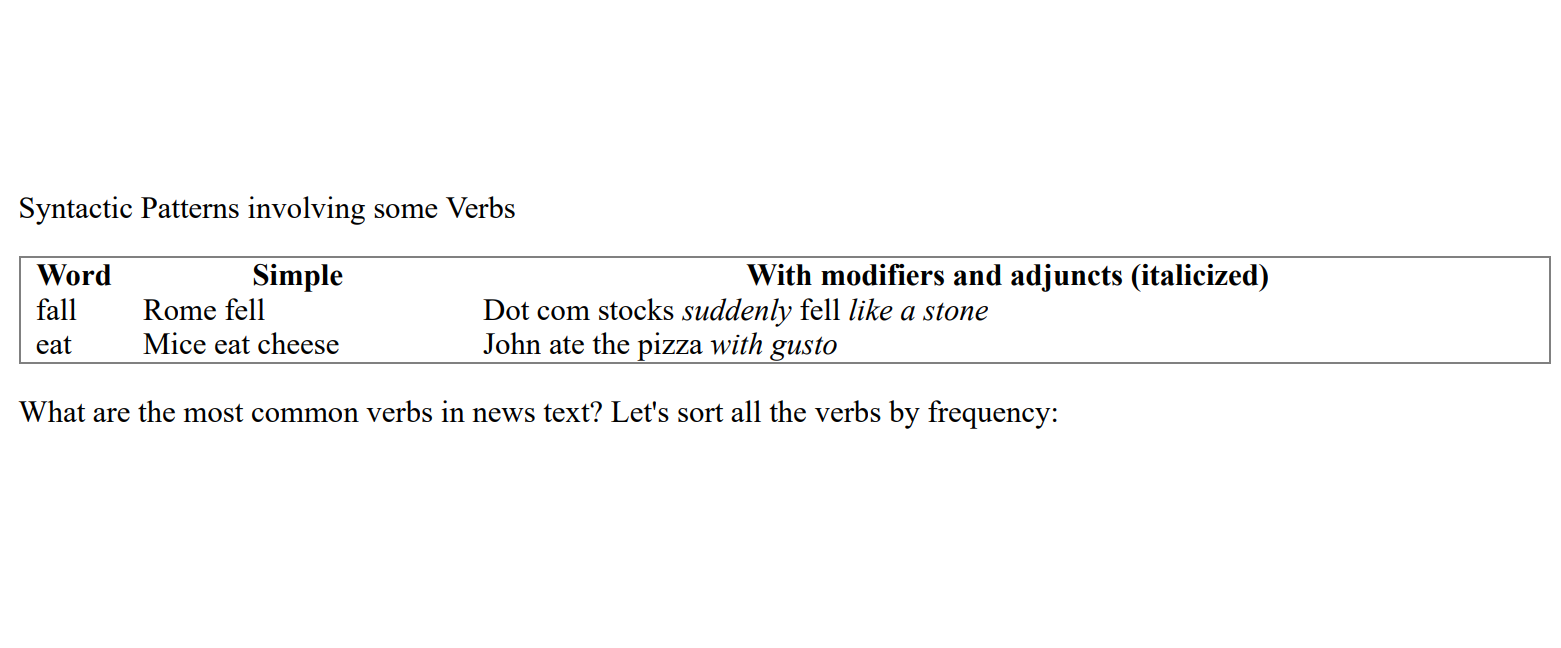




In [92]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']


['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


**Deatiled Explanation:**

This code snippet uses the Natural Language Toolkit (nltk) library in Python to analyze the Treebank Corpus, specifically focusing on the Universal POS (Part of Speech) tagset. Let's break down the code:

```python
import nltk

# Load the Treebank Corpus with Universal POS tags
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')

# Create a frequency distribution of word-tag pairs
word_tag_fd = nltk.FreqDist(wsj)

# Extract the most common verbs from the frequency distribution
verbs = [wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']
```

Explanation:

1. **Importing the nltk library:**
   ```python
   import nltk
   ```
   This line imports the Natural Language Toolkit library.

2. **Loading the Treebank Corpus with Universal POS tags:**
   ```python
   wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
   ```
   The code uses the `tagged_words` function to retrieve the words from the Treebank Corpus with Universal POS tags. The `'universal'` tagset represents a simplified, cross-linguistic set of POS tags.

3. **Creating a frequency distribution of word-tag pairs:**
   ```python
   word_tag_fd = nltk.FreqDist(wsj)
   ```
   The `nltk.FreqDist()` function creates a frequency distribution of the word-tag pairs in the Treebank Corpus. It counts how often each word-tag combination occurs.

4. **Extracting the most common verbs:**
   ```python
   verbs = [wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']
   ```
   - `word_tag_fd.most_common()` returns a list of word-tag pairs in descending order of frequency.
   - The list comprehension `[wt[0] for (wt, _) in ...]` extracts only the words (not the tags) from the most common word-tag pairs.
   - The condition `if wt[1] == 'VERB'` filters the list to include only those word-tag pairs where the tag is 'VERB', indicating verbs.

The final result, stored in the `verbs` variable, is a list of the most common verbs in the Treebank Corpus according to the Universal POS tagset. The actual verbs in the list will depend on the content of the corpus and the distribution of verbs in that dataset.

Note that the items being counted in the frequency distribution are word-tag pairs. Since words and tags are paired, we can treat
the word as a condition and the tag as an event, and initialize a conditional frequency distribution with a list of condition-event
pairs. This lets us see a frequency-ordered list of tags given a word:

In [93]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()




[('VERB', 28), ('NOUN', 20)]

**Detailed Explanation:**

Let's break down the provided code step by step:

1. **Creating a Conditional Frequency Distribution (cfd1):**
   ```python
   cfd1 = nltk.ConditionalFreqDist(wsj)
   ```
   This line creates a `ConditionalFreqDist` object (`cfd1`) using the Wall Street Journal (wsj) data. The `ConditionalFreqDist` class is used to count frequencies of word occurrences given a specific condition. In this case, it is counting word occurrences based on the conditions provided by the Wall Street Journal data.

2. **Accessing the frequency distribution for the word 'yield':**
   ```python
   cfd1['yield'].most_common()
   ```
   This line accesses the frequency distribution for the word 'yield' using the `most_common()` method. The `most_common()` method returns a list of tuples representing the most common elements along with their frequencies.

Putting it all together:

```python
import nltk

# Assuming wsj is a list of words from the Wall Street Journal
wsj = nltk.corpus.treebank.words()

# Creating a Conditional Frequency Distribution (cfd1)
cfd1 = nltk.ConditionalFreqDist(wsj)

# Accessing the frequency distribution for the word 'yield'
yield_freq_distribution = cfd1['yield'].most_common()

# Display the result
print(yield_freq_distribution)
```

After running this code with actual data, `yield_freq_distribution` will be a list of tuples where each tuple contains a context and the corresponding frequency of the word 'yield' in that context in the Wall Street Journal data.

Note: The code assumes that `wsj` is a list of words from the Wall Street Journal. In practice, you might need to adapt it based on your specific use case and data availability.

In [94]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

# 2.5 Adjectives and Adverbs

Two other important word classes are adjectives and adverbs. Adjectives describe nouns, and can be used as modifiers (e.g.
large in the large pizza), or in predicates (e.g. the pizza is large). English adjectives can have internal structure (e.g. fall+ing in
the falling stocks). Adverbs modify verbs to specify the time, manner, place or direction of the event described by the verb (e.g.
quickly in the stocks fell quickly). Adverbs may also modify adjectives (e.g. really in Mary's teacher was really nice).
English has several categories of closed class words in addition to prepositions, such as articles (also often called determiners)
(e.g., the, a), modals (e.g., should, may), and personal pronouns (e.g., she, they). Each dictionary and grammar classifies these
words differently.



# 3 Mapping Words to Properties Using Python Dictionaries
As we have seen, a tagged word of the form (word, tag) is an association between a word and a part-of-speech tag. Once we
start doing part-of-speech tagging, we will be creating programs that assign a tag to a word, the tag which is most likely in a
given context. We can think of this process as mapping from words to tags. 

**The most natural way to store mappings in Python
uses the so-called dictionary data type (also known as an associative array or hash array in other programming languages).**

In
this section we look at dictionaries and see how they can represent a variety of language information, including parts of speech.


# 3.1 Indexing Lists vs Dictionaries
A text, as we have seen, is treated in Python as a list of words. An important property of lists is that we can "look up" a
particular item by giving its index, e.g. text1[100]. Notice how we specify a number, and get back a word. We can think of a list
as a simple kind of table, as shown below:

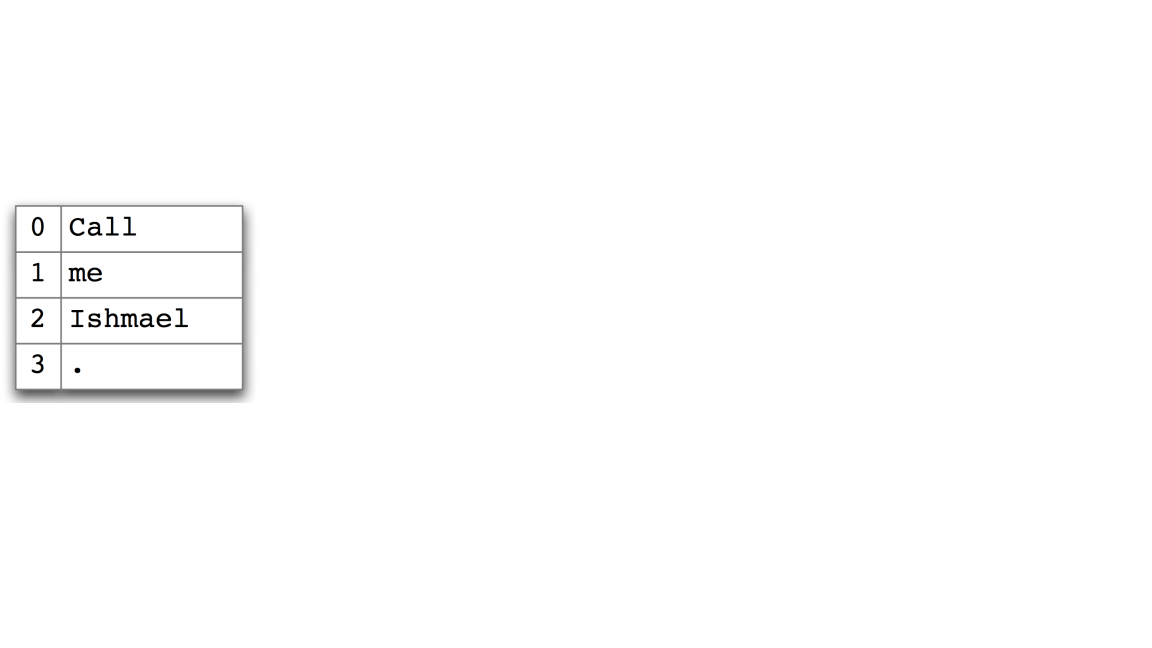

Dictionary Look-up: we access the entry of a dictionary using a key such as someone's name, a web domain,
or an English word; other names for dictionary are map, hashmap, hash, and associative array.

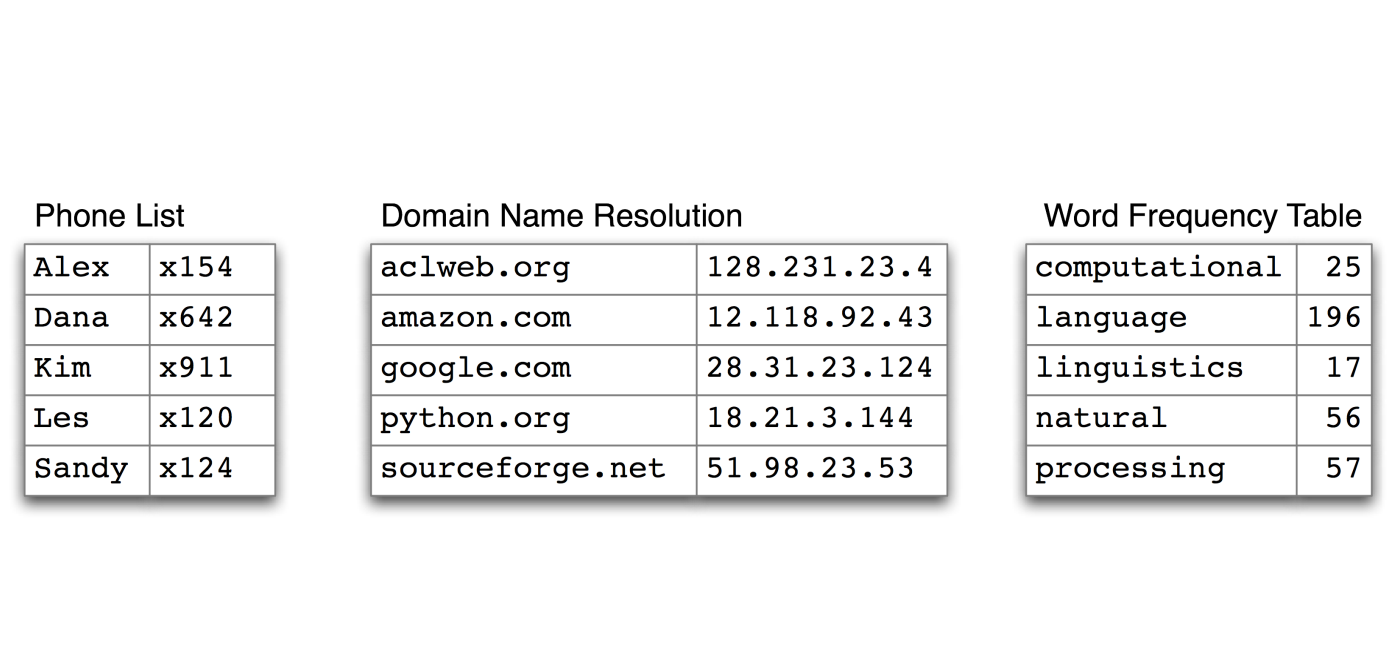


In the case of a phonebook, we look up an entry using a name, and get back a number. When we type a domain name in a web
browser, the computer looks this up to get back an IP address. A word frequency table allows us to look up a word and find its
frequency in a text collection. In all these cases, we are mapping from names to numbers, rather than the other way around as
with a list. 

In general, we would like to be able to map between arbitrary types of information. Following lists a variety of linguistic
objects, along with what they map.

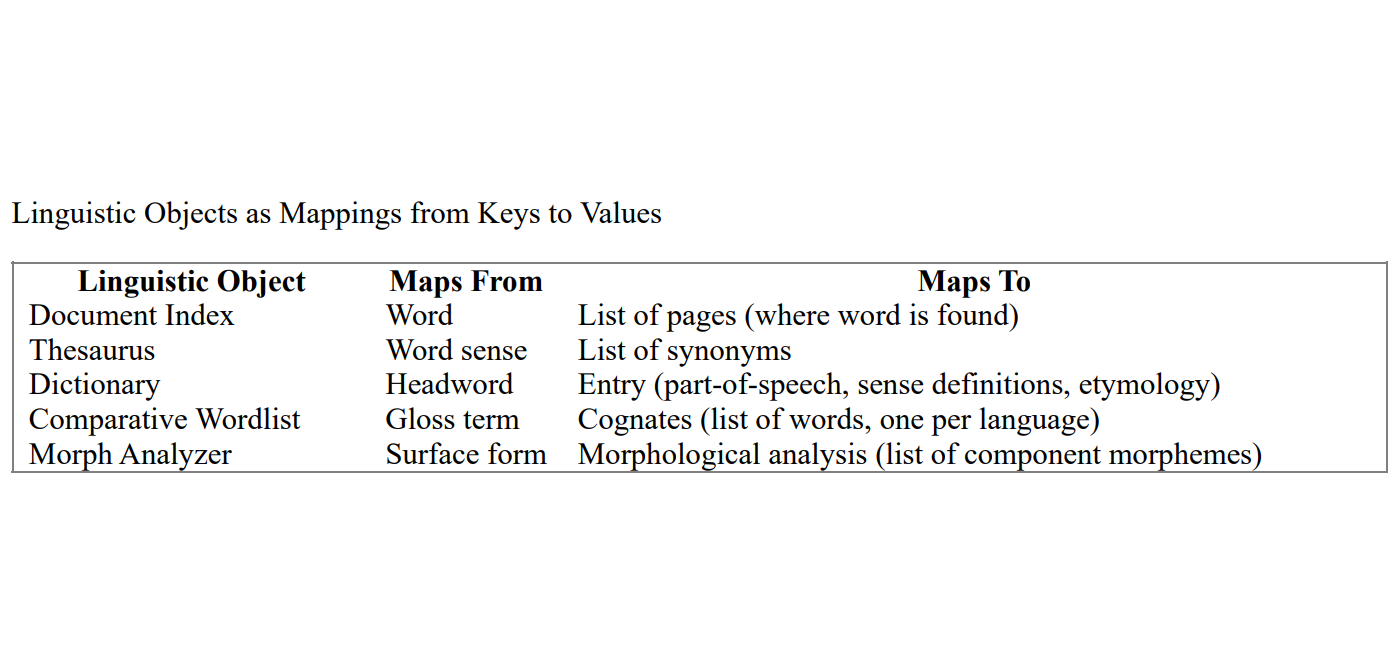

Most often, we are mapping from a "word" to some structured object. For example, a document index maps from a word (which
we can represent as a string), to a list of pages (represented as a list of integers). In this section, we will see how to represent
such mappings in Python.

# 3.2 Dictionaries in Python
Python provides a dictionary data type that can be used for mapping between arbitrary types. It is like a conventional
dictionary, in that it gives you an efficient way to look things up. 

To illustrate, we define pos to be an empty dictionary and then add four entries to it, specifying the part-of-speech of some
words. We add entries to a dictionary using the familiar square bracket notation:


In [95]:
pos = {}
pos


{}

In [96]:
pos['colorless'] = 'ADJ'
pos


{'colorless': 'ADJ'}

In [97]:
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [98]:
 pos['ideas']


'N'

In [99]:
pos['colorless']

'ADJ'

In [100]:
 list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [101]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

# 3.3 Defining Dictionaries

We can use the same key-value pair format to create a dictionary. There's a couple of ways to do this, and we will normally use
the first:


In [102]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

Note that dictionary keys must be immutable types, such as strings and tuples. If we try to define a dictionary using a mutable
key, we get a TypeError:

In [103]:
pos = {['ideas', 'blogs', 'adventures']: 'N'}


TypeError: unhashable type: 'list'

# 3.4 Default Dictionaries

If we try to access a key that is not in a dictionary, we get an error. However, its often useful if a dictionary can automatically
create an entry for this new key and give it a default value, such as zero or the empty list. For this reason, a special kind of
dictionary called a defaultdict is available. In order to use it, we have to supply a parameter which can be used to create the
default value, e.g. int, float, str, list, dict, tuple.

In [1]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']
#frequency['colorless']

4

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Importing the `defaultdict` class:**
   ```python
   from collections import defaultdict
   ```
   This line imports the `defaultdict` class from the `collections` module in Python.

2. **Creating a `defaultdict` with a default value of `int`:**
   ```python
   frequency = defaultdict(int)
   ```
   This line creates a `defaultdict` named `frequency` with a default value of `int`. This means that if you try to access a key that doesn't exist in the dictionary, it will automatically create the key with a default value of `0` (since `int()` returns `0`).

3. **Setting the frequency for the key 'colorless' to 4:**
   ```python
   frequency['colorless'] = 4
   ```
   This line sets the value associated with the key 'colorless' in the `frequency` dictionary to `4`.

4. **Accessing the value for the key 'ideas':**
   ```python
   frequency['ideas']
   ```
   This line accesses the value associated with the key 'ideas' in the `frequency` dictionary. Since 'ideas' has not been explicitly set before, it will use the default value of `int`, which is `0`.

Putting it all together:

```python
from collections import defaultdict

# Creating a defaultdict with a default value of int (0)
frequency = defaultdict(int)

# Setting the frequency for the key 'colorless' to 4
frequency['colorless'] = 4

# Accessing the value for the key 'ideas' (default value of 0)
ideas_frequency = frequency['ideas']

# Display the result
print(ideas_frequency)
```

After running this code, `ideas_frequency` will be `0` because the key 'ideas' was not explicitly set, and the default value for the `int` type is `0`.

In [3]:
pos = defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']
pos['ideas']
#pos['sleep']

['NOUN', 'VERB']

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Importing the `defaultdict` class:**
   ```python
   from collections import defaultdict
   ```
   This line imports the `defaultdict` class from the `collections` module in Python.

2. **Creating a `defaultdict` with a default value of `list`:**
   ```python
   pos = defaultdict(list)
   ```
   This line creates a `defaultdict` named `pos` with a default value of an empty list. This means that if you try to access a key that doesn't exist in the dictionary, it will automatically create the key with a default value of an empty list.

3. **Setting a list of POS (Part of Speech) values for the key 'sleep':**
   ```python
   pos['sleep'] = ['NOUN', 'VERB']
   ```
   This line sets the value associated with the key 'sleep' in the `pos` dictionary to a list containing the POS values 'NOUN' and 'VERB'.

4. **Accessing the value for the key 'ideas':**
   ```python
   pos['ideas']
   ```
   This line accesses the value associated with the key 'ideas' in the `pos` dictionary. Since 'ideas' has not been explicitly set before, it will use the default value of an empty list.

Putting it all together:

```python
from collections import defaultdict

# Creating a defaultdict with a default value of list (empty list)
pos = defaultdict(list)

# Setting a list of POS values for the key 'sleep'
pos['sleep'] = ['NOUN', 'VERB']

# Accessing the value for the key 'ideas' (default value of an empty list)
ideas_pos = pos['ideas']

# Display the result
print(ideas_pos)
```

After running this code, `ideas_pos` will be an empty list because the key 'ideas' was not explicitly set, and the default value for the `list` type is an empty list.

# 3.5 Incrementally Updating a Dictionary
We can employ dictionaries to count occurrences, emulating the method for tallying words shown in fig-tally. We begin by
initializing an empty defaultdict, then process each part-of-speech tag in the text. If the tag hasn't been seen before, it will have
a zero count by default. Each time we encounter a tag, we increment its count using the += operator.

In [106]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1

counts['NOUN']


30654

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Importing the `defaultdict` class:**
   ```python
   from collections import defaultdict
   ```
   This line imports the `defaultdict` class from the `collections` module in Python.

2. **Creating a `defaultdict` with a default value of `int`:**
   ```python
   counts = defaultdict(int)
   ```
   This line creates a `defaultdict` named `counts` with a default value of `int`. This means that if you try to access a key that doesn't exist in the dictionary, it will automatically create the key with a default value of `0`.

3. **Importing the Brown Corpus from nltk:**
   ```python
   from nltk.corpus import brown
   ```
   This line imports the Brown Corpus from the Natural Language Toolkit (nltk) library.

4. **Iterating over tagged words in the 'news' category of the Brown Corpus:**
   ```python
   for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
       counts[tag] += 1
   ```
   This loop iterates over each word-tag pair in the 'news' category of the Brown Corpus with the 'universal' tagset. For each unique POS tag, it increments the corresponding count in the `counts` dictionary.

5. **Accessing the count for the 'NOUN' tag:**
   ```python
   counts['NOUN']
   ```
   This line accesses the count for the 'NOUN' tag in the `counts` dictionary.

Putting it all together:

```python
from collections import defaultdict
from nltk.corpus import brown

# Creating a defaultdict with a default value of int (0)
counts = defaultdict(int)

# Iterating over tagged words in the 'news' category of the Brown Corpus
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1

# Accessing the count for the 'NOUN' tag
noun_count = counts['NOUN']

# Display the result
print(noun_count)
```

After running this code, `noun_count` will contain the count of occurrences of the 'NOUN' tag in the 'news' category of the Brown Corpus. The output will be a numerical value representing how many times the 'NOUN' tag appears in the specified dataset.

In [105]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [109]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

last_letters['en']


['abdomen',
 'Aberdeen',
 'Achen',
 'acrogen',
 'acumen',
 'acylogen',
 'aerogen',
 'aethogen',
 'afikomen',
 'agen',
 'agglutinogen',
 'agnomen',
 'Aileen',
 'airohydrogen',
 'albumen',
 'alchochoden',
 'alen',
 'alien',
 'alkaligen',
 'alkargen',
 'alkylogen',
 'Allen',
 'allergen',
 'almochoden',
 'almuten',
 'alpeen',
 'Alpen',
 'alunogen',
 'ameen',
 'Amen',
 'amen',
 'amidogen',
 'aminogen',
 'aminothiophen',
 'amphigen',
 'amylogen',
 'analgen',
 'anaphylactogen',
 'androgen',
 'antegarden',
 'antialien',
 'antianaphylactogen',
 'antigen',
 'antiketogen',
 'antioxygen',
 'antipathogen',
 'anywhen',
 'Aouellimiden',
 'aquagreen',
 'archflamen',
 'arisen',
 'armozeen',
 'arpen',
 'arsenophen',
 'arsheen',
 'ascolichen',
 'ashen',
 'asimen',
 'aspen',
 'Astropecten',
 'asudden',
 'Aten',
 'attagen',
 'atween',
 'augen',
 'avourneen',
 'awaken',
 'Awellimiden',
 'ayegreen',
 'azogreen',
 'azophen',
 'baboen',
 'backen',
 'baken',
 'bakeoven',
 'balden',
 'baleen',
 'barken',
 'barre

**Detailed Explanation**


Let's break down the provided code step by step:

1. **Importing necessary libraries:**
   ```python
   from collections import defaultdict
   import nltk
   ```
   This code imports the `defaultdict` class from the `collections` module and the Natural Language Toolkit (`nltk`).

2. **Creating a `defaultdict` with default values as empty lists:**
   ```python
   last_letters = defaultdict(list)
   ```
   This line creates a `defaultdict` named `last_letters` with default values as empty lists. This dictionary will be used to group words based on their last two letters.

3. **Getting a list of English words from the nltk corpus:**
   ```python
   words = nltk.corpus.words.words('en')
   ```
   This line retrieves a list of English words from the nltk corpus.

4. **Iterating through each word and grouping them based on their last two letters:**
   ```python
   for word in words:
       key = word[-2:]
       last_letters[key].append(word)
   ```
   This loop iterates through each word in the list of English words. It extracts the last two letters of each word (`word[-2:]`) and uses them as a key to the `last_letters` dictionary. The word is then appended to the list associated with that key.

5. **Retrieving the list of words with the last two letters 'en':**
   ```python
   last_letters['en']
   ```
   This line retrieves the list of words with the last two letters 'en' from the `last_letters` dictionary.

Putting it all together:

```python
from collections import defaultdict
import nltk

# Create a defaultdict with default values as empty lists
last_letters = defaultdict(list)

# Get a list of English words from the nltk corpus
words = nltk.corpus.words.words('en')

# Iterate through each word and group them based on their last two letters
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

# Retrieve the list of words with the last two letters 'en'
words_with_en_suffix = last_letters['en']

# Display the result
print(words_with_en_suffix)
```

After running this code, `words_with_en_suffix` will contain a list of English words from the nltk corpus that end with the letters 'en'. The specific words in the list will depend on the words available in the nltk corpus.

In [110]:
last_letters['zy']


['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy',
 'fizzy',
 'floozy',
 'fozy',
 'franzy',
 'frenzy',
 'friezy',
 'frizzy',
 'frowzy',
 'furzy',
 'fuzzy',
 'gauzy',
 'gazy',
 'glazy',
 'groszy',
 'hazy',
 'heezy',
 'Izzy',
 'jazzy',
 'Jozy',
 'lawzy',
 'lazy',
 'mazy',
 'mizzy',
 'muzzy',
 'nizy',
 'oozy',
 'quartzy',
 'quizzy',
 'refrenzy',
 'ritzy',
 'Shortzy',
 'sizy',
 'sleazy',
 'sneezy',
 'snoozy',
 'squeezy',
 'Suzy',
 'tanzy',
 'tizzy',
 'topazy',
 'trotcozy',
 'twazzy',
 'unbreezy',
 'unfrizzy',
 'wheezy',
 'woozy',
 'wuzzy',
 'yezzy']

# Anagrams

For example, if you take the letters from the words “a gentleman,” you can rearrange them to spell “elegant man.” By rearranging “Clint Eastwood,” you can spell “old west action.” “William Shakespeare” can be rearranged to spell “I'll make a wise phrase.” 

In [111]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Importing necessary libraries:**
   ```python
   from collections import defaultdict
   ```
   This code imports the `defaultdict` class from the `collections` module in Python.

2. **Creating a `defaultdict` with default values as empty lists:**
   ```python
   anagrams = defaultdict(list)
   ```
   This line creates a `defaultdict` named `anagrams` with default values as empty lists. This dictionary will be used to group words based on their sorted letters, effectively grouping anagrams together.

3. **Iterating through each word and grouping them based on their sorted letters:**
   ```python
   for word in words:
       key = ''.join(sorted(word))
       anagrams[key].append(word)
   ```
   This loop iterates through each word in some list of words (assuming `words` is defined elsewhere). For each word, it sorts its letters alphabetically (`sorted(word)`) and then joins them back into a string (`''.join(...)`). This sorted string is used as a key in the `anagrams` dictionary, and the original word is appended to the list associated with that key.

4. **Retrieving the list of anagrams for the letters 'aeilnrt':**
   ```python
   anagrams['aeilnrt']
   ```
   This line retrieves the list of words that have the same letters as 'aeilnrt' when sorted. In this case, it would contain words that are anagrams of each other.

Putting it all together:

```python
from collections import defaultdict

# Create a defaultdict with default values as empty lists
anagrams = defaultdict(list)

# Assuming words is a list of words
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

# Retrieve the list of anagrams for the letters 'aeilnrt'
anagrams_for_aeilnrt = anagrams['aeilnrt']

# Display the result
print(anagrams_for_aeilnrt)
```

After running this code, `anagrams_for_aeilnrt` will contain a list of words that are anagrams of each other, based on the sorted combination of their letters. The specific words in the list will depend on the words available in the `words` list.

Since accumulating words like this is such a common task, NLTK provides a more convenient way of creating a
defaultdict(list), in the form of nltk.Index()

In [ ]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']


**Detailed Explanation**

Let's break down the provided code step by step:

1. **Importing necessary libraries:**
   ```python
   import nltk
   ```
   This line imports the Natural Language Toolkit (`nltk`) library in Python.

2. **Creating an index of anagrams using a generator expression:**
   ```python
   anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
   ```
   This line creates an index (`anagrams`) using the `nltk.Index` function. The index is constructed using a generator expression. For each word `w` in the list of words (`words`), the generator expression creates a tuple `(''.join(sorted(w)), w)`. The first element of the tuple is the word's letters sorted alphabetically, and the second element is the original word.

3. **Retrieving the list of anagrams for the letters 'aeilnrt':**
   ```python
   anagrams['aeilnrt']
   ```
   This line retrieves the list of words that have the same letters as 'aeilnrt' when sorted. In this case, it would contain words that are anagrams of each other.

Putting it all together:

```python
import nltk

# Assuming words is a list of words
words = ['train', 'niter', 'retina', 'retain']

# Create an index of anagrams using a generator expression
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)

# Retrieve the list of anagrams for the letters 'aeilnrt'
anagrams_for_aeilnrt = anagrams['aeilnrt']

# Display the result
print(anagrams_for_aeilnrt)
```

After running this code, `anagrams_for_aeilnrt` will contain a list of words that are anagrams of each other, based on the sorted combination of their letters. The specific words in the list will depend on the words available in the `words` list. In this example, it would include words like 'train', 'niter', 'retina', and 'retain'.

# 4 Automatic Tagging

In [6]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
print(brown_tagged_sents)
print(brown_sents)


[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Importing the Brown Corpus from nltk:**
   ```python
   from nltk.corpus import brown
   ```
   This line imports the Brown Corpus from the Natural Language Toolkit (nltk) library.

2. **Loading tagged sentences from the 'news' category of the Brown Corpus:**
   ```python
   brown_tagged_sents = brown.tagged_sents(categories='news')
   ```
   This line loads the tagged sentences from the 'news' category of the Brown Corpus using the `tagged_sents` function. Each sentence is represented as a list of tuples, where each tuple contains a word and its corresponding POS (Part of Speech) tag.

3. **Loading untagged sentences from the 'news' category of the Brown Corpus:**
   ```python
   brown_sents = brown.sents(categories='news')
   ```
   This line loads the untagged sentences from the 'news' category of the Brown Corpus using the `sents` function. Each sentence is represented as a list of words.

Putting it all together:

```python
from nltk.corpus import brown

# Loading tagged sentences from the 'news' category of the Brown Corpus
brown_tagged_sents = brown.tagged_sents(categories='news')

# Loading untagged sentences from the 'news' category of the Brown Corpus
brown_sents = brown.sents(categories='news')
```

After running this code, `brown_tagged_sents` will contain a list of tagged sentences, and `brown_sents` will contain a list of untagged sentences, both extracted from the 'news' category of the Brown Corpus. These datasets can be used for various natural language processing tasks, such as part-of-speech tagging, named entity recognition, and syntactic parsing.

# 4.1 The Default Tagger

The simplest possible tagger assigns the same tag to each token. This may seem to be a rather banal step, but it establishes an
important baseline for tagger performance. In order to get the best result, we tag each word with the most likely tag. Let's find
out which tag is most likely (now using the unsimplified tagset):


In [8]:
import nltk
importtags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()


'NN'

Now we can create a tagger that tags everything as NN.


In [10]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)


[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Importing the nltk library:**
   ```python
   import nltk
   ```
   This line imports the Natural Language Toolkit (nltk) library in Python.

2. **Defining a raw string:**
   ```python
   raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
   ```
   This line defines a raw string `raw` containing a sentence from the book "Green Eggs and Ham" by Dr. Seuss.

3. **Tokenizing the raw string into words:**
   ```python
   tokens = nltk.word_tokenize(raw)
   ```
   This line uses the `nltk.word_tokenize` function to tokenize the raw string into a list of words. Each word in the sentence becomes an element in the `tokens` list.

4. **Creating a DefaultTagger with the tag 'NN' (noun):**
   ```python
   default_tagger = nltk.DefaultTagger('NN')
   ```
   This line creates a `DefaultTagger` named `default_tagger` with the default tag set to 'NN' (noun). This means that if the tagger encounters a word and doesn't have specific information about its part-of-speech, it will assign the default tag 'NN' to that word.

5. **Tagging the tokens using the DefaultTagger:**
   ```python
   default_tagger.tag(tokens)
   ```
   This line uses the `tag` method of the `DefaultTagger` to tag each token in the `tokens` list. The result is a list of tuples where each tuple contains a word and its corresponding POS (Part of Speech) tag. Since the default tag is set to 'NN', every word in the sentence will be tagged as a noun.

Putting it all together:

```python
import nltk

# Defining a raw string
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'

# Tokenizing the raw string into words
tokens = nltk.word_tokenize(raw)

# Creating a DefaultTagger with the tag 'NN'
default_tagger = nltk.DefaultTagger('NN')

# Tagging the tokens using the DefaultTagger
tagged_tokens = default_tagger.tag(tokens)

# Display the result
print(tagged_tokens)
```

After running this code, `tagged_tokens` will contain a list of tuples where each tuple contains a word and its corresponding POS tag. Since the DefaultTagger is set to tag everything as a noun ('NN'), the output will show each word in the sentence tagged as a noun.

Unsurprisingly, this method performs rather poorly. On a typical corpus, it will tag only about an eighth of the tokens correctly,
as we see below:


In [11]:
default_tagger.evaluate(brown_tagged_sents)


C:\Users\Dr. S Padmaja\AppData\Local\Temp\ipykernel_8364\2785623636.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  default_tagger.evaluate(brown_tagged_sents)


0.13089484257215028

# 4.2 The Regular Expression Tagger

The regular expression tagger assigns tags to tokens on the basis of matching patterns. For instance, we might guess that any
word ending in ed is the past participle of a verb, and any word ending with 's is a possessive noun. We can express these as a
list of regular expressions:


In [12]:
 patterns = [
... (r'.*ing$', 'VBG'), # gerunds
... (r'.*ed$', 'VBD'), # simple past
... (r'.*es$', 'VBZ'), # 3rd singular present
... (r'.*ould$', 'MD'), # modals
... (r'.*\'s$', 'NN$'), # possessive nouns
... (r'.*s$', 'NNS'), # plural nouns
... (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'), # cardinal numbers
... (r'.*', 'NN') # nouns (default)
... ]

**Detailed Explanation**

The provided code defines a list of tuples, where each tuple consists of a regular expression pattern and its corresponding POS (Part of Speech) tag. These patterns are typically used in natural language processing tasks, such as part-of-speech tagging. Let's break down the patterns step by step:

1. **Gerunds (VBG):**
   ```python
   (r'.*ing$', 'VBG')
   ```
   - `r'.*ing$'`: This regular expression matches words ending with 'ing'.
   - `'VBG'`: The corresponding POS tag for words matching this pattern is 'VBG', which stands for gerunds.

2. **Simple Past (VBD):**
   ```python
   (r'.*ed$', 'VBD')
   ```
   - `r'.*ed$'`: This regular expression matches words ending with 'ed'.
   - `'VBD'`: The corresponding POS tag for words matching this pattern is 'VBD', which stands for simple past tense verbs.

3. **3rd Singular Present (VBZ):**
   ```python
   (r'.*es$', 'VBZ')
   ```
   - `r'.*es$'`: This regular expression matches words ending with 'es'.
   - `'VBZ'`: The corresponding POS tag for words matching this pattern is 'VBZ', which stands for 3rd person singular present verbs.

4. **Modals (MD):**
   ```python
   (r'.*ould$', 'MD')
   ```
   - `r'.*ould$'`: This regular expression matches words ending with 'ould'.
   - `'MD'`: The corresponding POS tag for words matching this pattern is 'MD', which stands for modals.

5. **Possessive Nouns (NN$):**
   ```python
   (r'.*\'s$', 'NN$')
   ```
   - `r'.*\'s$'`: This regular expression matches words ending with 's'.
   - `'NN$'`: The corresponding POS tag for words matching this pattern is 'NN$', which stands for possessive nouns.

6. **Plural Nouns (NNS):**
   ```python
   (r'.*s$', 'NNS')
   ```
   - `r'.*s$'`: This regular expression matches words ending with 's'.
   - `'NNS'`: The corresponding POS tag for words matching this pattern is 'NNS', which stands for plural nouns.

7. **Cardinal Numbers (CD):**
   ```python
   (r'^-?[0-9]+(\.[0-9]+)?$', 'CD')
   ```
   - `r'^-?[0-9]+(\.[0-9]+)?$'`: This regular expression matches numeric values, including integers and decimal numbers.
   - `'CD'`: The corresponding POS tag for words matching this pattern is 'CD', which stands for cardinal numbers.

8. **Nouns (NN - Default):**
   ```python
   (r'.*', 'NN')
   ```
   - `r'.*'`: This regular expression matches any sequence of characters (default case).
   - `'NN'`: The corresponding POS tag for words matching this pattern is 'NN', which stands for nouns.

Putting it all together:

```python
patterns = [
    (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*es$', 'VBZ'),
    (r'.*ould$', 'MD'),
    (r'.*\'s$', 'NN$'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),
    (r'.*', 'NN')
]
```

These patterns can be used in conjunction with a regular expression-based tagger in NLTK to assign POS tags to words in a given text based on these defined patterns.

Note that these are processed in order, and the first one that matches is applied. Now we can set up a tagger and use it to tag a
sentence. Now its right about a fifth of the time.


In [13]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])


[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Creating a RegexpTagger with predefined patterns:**
   ```python
   regexp_tagger = nltk.RegexpTagger(patterns)
   ```
   This line creates a `RegexpTagger` named `regexp_tagger` using the predefined patterns. The `patterns` list contains tuples where each tuple consists of a regular expression pattern and its corresponding POS tag.

2. **Tagging a sentence using the RegexpTagger:**
   ```python
   regexp_tagger.tag(brown_sents[3])
   ```
   This line uses the `tag` method of the `RegexpTagger` to tag the words in the 4th sentence (`brown_sents[3]`) from the Brown Corpus. The `tag` method applies the regular expression patterns to each word in the sentence and assigns the appropriate POS tag based on the matching pattern.

Putting it all together:

```python
import nltk

# Assuming 'patterns' is defined with the regular expression patterns
patterns = [
    (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*es$', 'VBZ'),
    (r'.*ould$', 'MD'),
    (r'.*\'s$', 'NN$'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),
    (r'.*', 'NN')
]

# Creating a RegexpTagger with predefined patterns
regexp_tagger = nltk.RegexpTagger(patterns)

# Tagging a sentence using the RegexpTagger
tagged_sentence = regexp_tagger.tag(brown_sents[3])

# Display the result
print(tagged_sentence)
```

After running this code, `tagged_sentence` will contain a list of tuples where each tuple consists of a word and its corresponding POS tag, assigned by the regular expression patterns defined in the `patterns` list. The output will show how each word in the 4th sentence of the Brown Corpus is tagged based on the patterns.

In [14]:
regexp_tagger.evaluate(brown_tagged_sents)


C:\Users\Dr. S Padmaja\AppData\Local\Temp\ipykernel_8364\966795858.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  regexp_tagger.evaluate(brown_tagged_sents)


0.20186168625812995

**Detailed Explanation**

The `evaluate` method in NLTK is typically used to assess the performance of a tagger by comparing its predictions against a gold standard. In this case, `regexp_tagger.evaluate(brown_tagged_sents)` is evaluating the performance of the regular expression-based tagger (`regexp_tagger`) on a dataset of pre-tagged sentences (`brown_tagged_sents`) from the Brown Corpus.

Let's break down the evaluation step by step:

1. **The `evaluate` method:**
   ```python
   regexp_tagger.evaluate(brown_tagged_sents)
   ```
   This line calls the `evaluate` method on the `regexp_tagger` object. The `evaluate` method typically takes a list of tagged sentences as its argument.

2. **The argument `brown_tagged_sents`:**
   ```python
   brown_tagged_sents
   ```
   This represents a list of tagged sentences from the Brown Corpus. Each sentence is represented as a list of tuples, where each tuple contains a word and its corresponding POS (Part of Speech) tag. This dataset serves as the gold standard against which the tagger's predictions will be compared.

3. **Evaluation process:**
   The `evaluate` method compares the POS tags assigned by the `regexp_tagger` to the gold standard POS tags in `brown_tagged_sents`. It calculates accuracy by determining the percentage of correctly tagged words out of the total number of words in the dataset.

Putting it all together:

```python
import nltk

# Assuming 'patterns' is defined with the regular expression patterns
patterns = [
    (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*es$', 'VBZ'),
    (r'.*ould$', 'MD'),
    (r'.*\'s$', 'NN$'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),
    (r'.*', 'NN')
]

# Creating a RegexpTagger with predefined patterns
regexp_tagger = nltk.RegexpTagger(patterns)

# Assuming brown_tagged_sents is a list of tagged sentences from the Brown Corpus
brown_tagged_sents = ...

# Evaluating the tagger's performance on the Brown Corpus
accuracy = regexp_tagger.evaluate(brown_tagged_sents)

# Display the result
print(f'Accuracy: {accuracy:.2%}')
```

After running this code, `accuracy` will contain the percentage of correctly tagged words, and the result will be printed as the accuracy of the regular expression-based tagger on the specified dataset.

# 4.3 The Lookup Tagger

A lot of high-frequency words do not have the NN tag. Let's find the hundred most frequent words and store their most likely tag.
We can then use this information as the model for a "lookup tagger" (an NLTK UnigramTagger):


In [15]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)


C:\Users\Dr. S Padmaja\AppData\Local\Temp\ipykernel_8364\1878628651.py:6: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  baseline_tagger.evaluate(brown_tagged_sents)


0.45578495136941344

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Creating a Frequency Distribution of Words (fd):**
   ```python
   fd = nltk.FreqDist(brown.words(categories='news'))
   ```
   This line creates a Frequency Distribution (`fd`) of words from the 'news' category of the Brown Corpus. It counts the occurrences of each word in the specified category.

2. **Creating a Conditional Frequency Distribution of Word-Tag Pairs (cfd):**
   ```python
   cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
   ```
   This line creates a Conditional Frequency Distribution (`cfd`) of word-tag pairs from the 'news' category of the Brown Corpus. It counts the occurrences of each word-tag pair in the specified category.

3. **Extracting the Most Frequent 100 Words:**
   ```python
   most_freq_words = fd.most_common(100)
   ```
   This line extracts the 100 most frequent words from the Frequency Distribution (`fd`). It returns a list of tuples, where each tuple contains a word and its frequency.

4. **Creating a Dictionary of Likely Tags for Most Frequent Words:**
   ```python
   likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
   ```
   This line creates a dictionary (`likely_tags`) where each word from the most frequent words list is associated with its most likely POS tag based on the Conditional Frequency Distribution (`cfd`). The `cfd[word].max()` returns the most common tag for each word.

5. **Creating a Unigram Tagger (baseline_tagger):**
   ```python
   baseline_tagger = nltk.UnigramTagger(model=likely_tags)
   ```
   This line creates a Unigram Tagger (`baseline_tagger`) using the `nltk.UnigramTagger` class and provides the `likely_tags` dictionary as the model. The Unigram Tagger assigns the most likely POS tag for each word based on the provided model.

6. **Evaluating the Baseline Tagger:**
   ```python
   baseline_tagger.evaluate(brown_tagged_sents)
   ```
   This line evaluates the performance of the baseline tagger on a dataset of pre-tagged sentences (`brown_tagged_sents`) from the 'news' category of the Brown Corpus. The `evaluate` method compares the tagger's predictions to the gold standard tags and calculates accuracy.

Putting it all together:

```python
import nltk

# Creating a Frequency Distribution of Words
fd = nltk.FreqDist(brown.words(categories='news'))

# Creating a Conditional Frequency Distribution of Word-Tag Pairs
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

# Extracting the Most Frequent 100 Words
most_freq_words = fd.most_common(100)

# Creating a Dictionary of Likely Tags for Most Frequent Words
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

# Creating a Unigram Tagger
baseline_tagger = nltk.UnigramTagger(model=likely_tags)

# Evaluating the Baseline Tagger on the Brown Corpus
accuracy = baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

# Display the result
print(f'Accuracy: {accuracy:.2%}')
```

After running this code, it will print the accuracy of the baseline tagger on the specified dataset. The baseline tagger assigns POS tags based on the most likely tags for the 100 most frequent words in the 'news' category of the Brown Corpus.

# 4.4 Evaluation

In the above examples, you will have noticed an emphasis on accuracy scores. In fact, evaluating the performance of such tools
is a central theme in NLP. 


We evaluate the performance of a tagger relative to the tags a human expert would assign. Since we don't usually have access to
an expert and impartial human judge, we make do instead with **gold standard test data**. This is a corpus which has been
manually annotated and which is accepted as a standard against which the guesses of an automatic system are assessed. The
tagger is regarded as being correct if the tag it guesses for a given word is the same as the gold standard tag.


Of course, the humans who designed and carried out the original gold standard annotation were only human. Further analysis
might show mistakes in the gold standard, or may eventually lead to a revised tagset and more elaborate guidelines.
Nevertheless, the gold standard is by definition "correct" as far as the evaluation of an automatic tagger is concerned.



# 5 N-Gram Tagging

# 5.1 Unigram Tagging
Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular
token. For example, it will assign the tag JJ to any occurrence of the word frequent, since frequent is used as an adjective (e.g. a
frequent word) more often than it is used as a verb (e.g. I frequent this cafe). A unigram tagger behaves just like a lookup tagger
(4), except there is a more convenient technique for setting it up, called training. In the following code sample, we train a
unigram tagger, use it to tag a sentence, then evaluate:


In [6]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

NameError: name 'nltk' is not defined

**Detailed Explanation**

Let's break down the provided code step by step:

1. **Importing the Brown Corpus from nltk:**
   ```python
   from nltk.corpus import brown
   ```
   This line imports the Brown Corpus from the Natural Language Toolkit (nltk) library.

2. **Loading tagged sentences and untagged sentences from the 'news' category of the Brown Corpus:**
   ```python
   brown_tagged_sents = brown.tagged_sents(categories='news')
   brown_sents = brown.sents(categories='news')
   ```
   - `brown_tagged_sents`: This variable contains a list of tagged sentences from the 'news' category of the Brown Corpus. Each sentence is represented as a list of tuples, where each tuple contains a word and its corresponding POS (Part of Speech) tag.
   - `brown_sents`: This variable contains a list of untagged sentences from the 'news' category of the Brown Corpus. Each sentence is represented as a list of words.

3. **Creating a Unigram Tagger (unigram_tagger):**
   ```python
   unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
   ```
   This line creates a Unigram Tagger (`unigram_tagger`) using the `nltk.UnigramTagger` class and provides the list of tagged sentences (`brown_tagged_sents`) as training data. The Unigram Tagger uses the frequencies of individual words to predict their POS tags.

4. **Tagging a specific sentence with the Unigram Tagger:**
   ```python
   unigram_tagger.tag(brown_sents[2007])
   ```
   This line uses the `tag` method of the Unigram Tagger to tag the words in the 2008th sentence (`brown_sents[2007]`) from the 'news' category of the Brown Corpus. The result is a list of tuples where each tuple contains a word and its predicted POS tag.

Putting it all together:

```python
from nltk.corpus import brown
import nltk

# Loading tagged sentences and untagged sentences from the 'news' category of the Brown Corpus
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

# Creating a Unigram Tagger
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

# Tagging a specific sentence with the Unigram Tagger
tagged_sentence = unigram_tagger.tag(brown_sents[2007])

# Display the result
print(tagged_sentence)
```

After running this code, `tagged_sentence` will contain a list of tuples where each tuple consists of a word and its predicted POS tag assigned by the Unigram Tagger. The output will show how each word in the 2008th sentence of the 'news' category is tagged based on the trained Unigram Tagger.

In [ ]:
unigram_tagger.evaluate(brown_tagged_sents)


**Detailed Explanation**

The line `unigram_tagger.evaluate(brown_tagged_sents)` is evaluating the performance of a Unigram Tagger (`unigram_tagger`) on a dataset of pre-tagged sentences (`brown_tagged_sents`) from the Brown Corpus. Let's break down this process step by step:

1. **The Unigram Tagger (`unigram_tagger`):**
   ```python
   unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
   ```
   This line creates a Unigram Tagger using the `nltk.UnigramTagger` class and provides the list of tagged sentences (`brown_tagged_sents`) as training data. The Unigram Tagger uses the frequencies of individual words to predict their POS tags.

2. **The `evaluate` method:**
   ```python
   unigram_tagger.evaluate(brown_tagged_sents)
   ```
   This line calls the `evaluate` method on the Unigram Tagger object. The `evaluate` method typically takes a list of tagged sentences as its argument.

3. **The argument `brown_tagged_sents`:**
   ```python
   brown_tagged_sents
   ```
   This represents a list of tagged sentences from the Brown Corpus. Each sentence is represented as a list of tuples, where each tuple contains a word and its corresponding POS (Part of Speech) tag. This dataset serves as the gold standard against which the tagger's predictions will be compared.

4. **Evaluation process:**
   The `evaluate` method compares the POS tags assigned by the Unigram Tagger to the gold standard POS tags in `brown_tagged_sents`. It calculates accuracy by determining the percentage of correctly tagged words out of the total number of words in the dataset.

Putting it all together:

```python
from nltk.corpus import brown
import nltk

# Loading tagged sentences from the 'news' category of the Brown Corpus
brown_tagged_sents = brown.tagged_sents(categories='news')

# Creating a Unigram Tagger
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

# Evaluating the Unigram Tagger's performance on the Brown Corpus
accuracy = unigram_tagger.evaluate(brown_tagged_sents)

# Display the result
print(f'Accuracy: {accuracy:.2%}')
```

After running this code, it will print the accuracy of the Unigram Tagger on the specified dataset (`brown_tagged_sents`). The accuracy represents the percentage of correctly tagged words in the dataset based on the Unigram Tagger's predictions.

# 5.2 Separating the Training and Testing Data

Now that we are training a tagger on some data, we must be careful not to test it on the same data, as we did in the above
example. A tagger that simply memorized its training data and made no attempt to construct a general model would get a perfect
score, but would also be useless for tagging new text. Instead, we should split the data, training on 90% and testing on the
remaining 10%:

In [ ]:
size = int(len(brown_tagged_sents) * 0.9)
size




**Detailed Explaantion**


This code calculates the size of a training set by taking 90% of the total number of tagged sentences in the `brown_tagged_sents` dataset. Let's break down the code step by step:

```python
size = int(len(brown_tagged_sents) * 0.9)
```

1. **`len(brown_tagged_sents)`:**
   - This part calculates the total number of tagged sentences in the `brown_tagged_sents` dataset using the `len()` function.

2. **`* 0.9`:**
   - Multiplies the total number of tagged sentences by 0.9, which is equivalent to taking 90% of the total.

3. **`int(...)`:**
   - Converts the result to an integer. This is necessary because the size of a dataset (number of sentences) typically needs to be an integer, and it's common to round down when taking a percentage of a dataset.

4. **`size`:**
   - Stores the final calculated size in the variable `size`. This represents the size of the training set, which is 90% of the total number of tagged sentences.

In summary, this code calculates the size of a training set by determining 90% of the total number of tagged sentences in the `brown_tagged_sents` dataset and rounding down to the nearest integer. This is often done to reserve a portion of the dataset for training a model while keeping the remaining portion for testing or validation.

In [ ]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

**Detailed Explanation**

This code snippet is involved in splitting the tagged sentences from the Brown Corpus (`brown_tagged_sents`) into training and testing sets, and then using a Unigram Tagger to evaluate its performance on the testing set. Let's break down the code step by step:

```python
# Calculate the size of the training set (90% of the total)
size = int(len(brown_tagged_sents) * 0.9)

# Split the tagged sentences into training and testing sets
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
```

1. **`size = int(len(brown_tagged_sents) * 0.9)`:**
   - As explained earlier, this line calculates the size of the training set by taking 90% of the total number of tagged sentences in the `brown_tagged_sents` dataset.

2. **`train_sents = brown_tagged_sents[:size]`:**
   - Slices the first 90% of the tagged sentences (up to index `size`) to create the training set (`train_sents`).

3. **`test_sents = brown_tagged_sents[size:]`:**
   - Slices the remaining 10% of the tagged sentences (from index `size` onwards) to create the testing set (`test_sents`).

```python
# Create a Unigram Tagger and train it on the training set
unigram_tagger = nltk.UnigramTagger(train_sents)

# Evaluate the Unigram Tagger on the testing set
accuracy = unigram_tagger.evaluate(test_sents)
```

4. **`unigram_tagger = nltk.UnigramTagger(train_sents)`:**
   - Creates a Unigram Tagger (`unigram_tagger`) and trains it on the training set (`train_sents`). The Unigram Tagger uses the frequencies of individual words to predict their POS tags.

5. **`unigram_tagger.evaluate(test_sents)`:**
   - Evaluates the performance of the Unigram Tagger on the testing set (`test_sents`). It compares the tagger's predictions to the gold standard POS tags in the testing set and calculates accuracy.

In summary, this code is performing a common practice in natural language processing called "train-test split." It splits the tagged sentences into a training set (90% of the data) and a testing set (10% of the data), then trains a Unigram Tagger on the training set and evaluates its accuracy on the testing set. This helps assess how well the tagger generalizes to unseen data.

# 5.3 General N-Gram Tagging


When we perform a language processing task based on unigrams, we are using one item of context. In the case of tagging, we
only consider the current token, in isolation from any larger context. Given such a model, the best we can do is tag each word
with its a priori most likely tag. This means we would tag a word such as wind with the same tag, regardless of whether it
appears in the context the wind or to wind.


An n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech
tags of the n-1 preceding tokens, as shown below. The tag to be chosen, tn
, is circled, and the context is shaded in grey. In the
example of an n-gram tagger shown below, we have n=3; that is, we consider the tags of the two preceding words in addition to
the current word. An n-gram tagger picks the tag that is most likely in the given context.


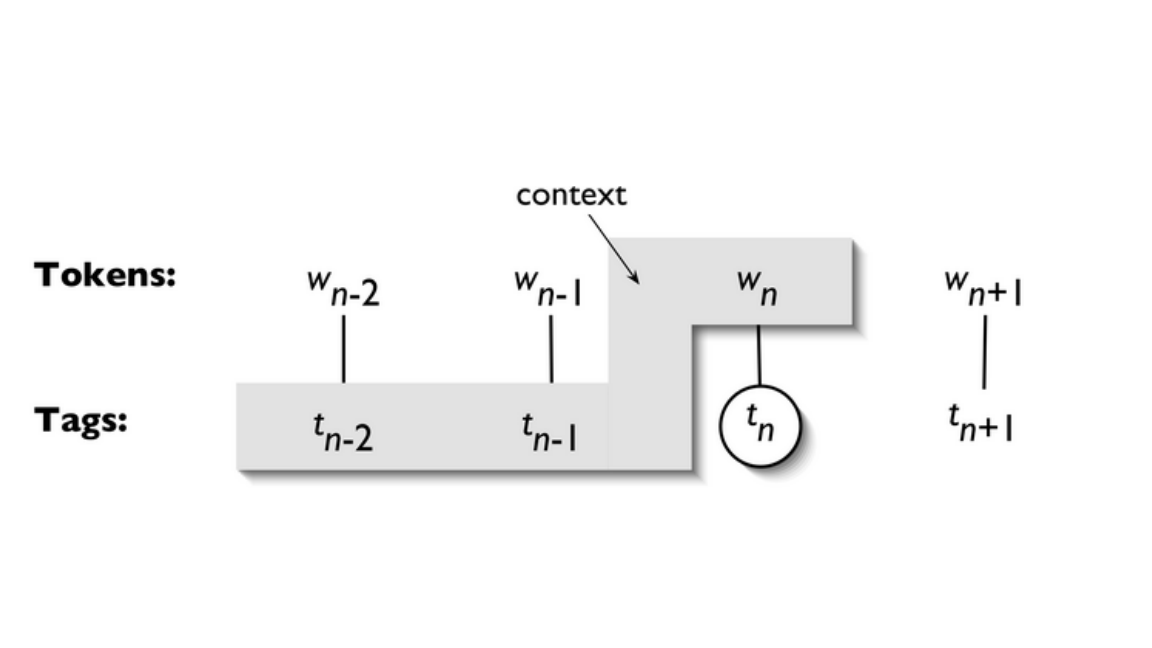


The NgramTagger class uses a tagged training corpus to determine which part-of-speech tag is most likely for each context. Here
we see a special case of an n-gram tagger, namely a bigram tagger. First we train it, then use it to tag untagged sentences:

In [7]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])


NameError: name 'nltk' is not defined

**Detailed Explanation**

This code snippet is creating a Bigram Tagger using the training set (`train_sents`) and then using the trained Bigram Tagger to tag the words in a specific sentence from the Brown Corpus (`brown_sents[2007]`). Let's break down the code step by step:

```python
# Create a Bigram Tagger and train it on the training set
bigram_tagger = nltk.BigramTagger(train_sents)

# Tag the words in a specific sentence using the Bigram Tagger
bigram_tagger.tag(brown_sents[2007])
```

1. **`bigram_tagger = nltk.BigramTagger(train_sents)`:**
   - Creates a Bigram Tagger (`bigram_tagger`) and trains it on the training set (`train_sents`). The Bigram Tagger uses information from pairs of consecutive words (bigrams) to predict POS tags.

2. **`bigram_tagger.tag(brown_sents[2007])`:**
   - Tags the words in the 2008th sentence (`brown_sents[2007]`) from the Brown Corpus using the trained Bigram Tagger. The `tag` method takes a list of words as input and returns a list of tuples where each tuple contains a word and its predicted POS tag.

In summary, this code is demonstrating the use of a Bigram Tagger. It first creates a Bigram Tagger and trains it on a training set (`train_sents`). Then, it applies the trained Bigram Tagger to tag the words in a specific sentence (`brown_sents[2007]`) to observe how well the tagger predicts POS tags based on the information from pairs of consecutive words in the training set.

In [8]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)


NameError: name 'bigram_tagger' is not defined

**Detailed Explanation**

This code snippet is using the previously trained Bigram Tagger (`bigram_tagger`) to tag the words in a specific sentence (`brown_sents[4203]`). Let's break down the code step by step:

```python
# Get an unseen sentence from the Brown Corpus
unseen_sent = brown_sents[4203]

# Tag the words in the unseen sentence using the Bigram Tagger
bigram_tagger.tag(unseen_sent)
```

1. **`unseen_sent = brown_sents[4203]`:**
   - Retrieves the 4204th sentence (`brown_sents[4203]`) from the Brown Corpus and assigns it to the variable `unseen_sent`. This sentence has not been used during the training of the Bigram Tagger and is considered "unseen."

2. **`bigram_tagger.tag(unseen_sent)`:**
   - Tags the words in the unseen sentence (`unseen_sent`) using the previously trained Bigram Tagger (`bigram_tagger`). The `tag` method takes a list of words as input and returns a list of tuples where each tuple contains a word and its predicted POS tag based on the information from pairs of consecutive words (bigrams) in the training set.

In summary, this code demonstrates the application of the trained Bigram Tagger to tag the words in a sentence that was not part of the training set. This allows us to observe how well the Bigram Tagger generalizes to unseen data and predicts POS tags for words it has not encountered during training.

Notice that the bigram tagger manages to tag every word in a sentence it saw during training, but does badly on an unseen
sentence. As soon as it encounters a new word (i.e., 13.5), it is unable to assign a tag. It cannot tag the following word (i.e.,
million) even if it was seen during training, simply because it never saw it during training with a None tag on the previous word.
Consequently, the tagger fails to tag the rest of the sentence. Its overall accuracy score is very low:


In [9]:
bigram_tagger.evaluate(test_sents)

NameError: name 'bigram_tagger' is not defined

# 5.4 Combining Taggers
One way to address the trade-off between accuracy and coverage is to use the more accurate algorithms when we can, but to fall
back on algorithms with wider coverage when necessary. For example, we could combine the results of a bigram tagger, a
unigram tagger, and a default tagger, as follows:
1. Try tagging the token with the bigram tagger.
2. If the bigram tagger is unable to find a tag for the token, try the unigram tagger.
3. If the unigram tagger is also unable to find a tag, use a default tagger.


Most NLTK taggers permit a backoff-tagger to be specified. The backoff-tagger may itself have a backoff tagger:


In [18]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)


NameError: name 'train_sents' is not defined

**Detailed Explanation**

This code snippet is creating a chain of taggers—a Default Tagger, a Unigram Tagger, and a Bigram Tagger—where each tagger serves as a fallback (backoff) for the next one in case of an inability to tag a word. The code then evaluates the performance of the combined tagger (`t2`) on a testing set (`test_sents`). Let's break down the code step by step:

```python
# Create a Default Tagger that tags every word as 'NN'
t0 = nltk.DefaultTagger('NN')

# Create a Unigram Tagger with a backoff to the Default Tagger
t1 = nltk.UnigramTagger(train_sents, backoff=t0)

# Create a Bigram Tagger with a backoff to the Unigram Tagger
t2 = nltk.BigramTagger(train_sents, backoff=t1)

# Evaluate the Bigram Tagger on the testing set
accuracy = t2.evaluate(test_sents)
```

1. **`t0 = nltk.DefaultTagger('NN')`:**
   - Creates a Default Tagger (`t0`) that assigns the POS tag 'NN' (noun) to every word.

2. **`t1 = nltk.UnigramTagger(train_sents, backoff=t0)`:**
   - Creates a Unigram Tagger (`t1`) and trains it on the training set (`train_sents`). If the Unigram Tagger is unable to tag a word, it falls back to the Default Tagger (`t0`) for tagging.

3. **`t2 = nltk.BigramTagger(train_sents, backoff=t1)`:**
   - Creates a Bigram Tagger (`t2`) and trains it on the training set (`train_sents`). If the Bigram Tagger is unable to tag a word, it falls back to the Unigram Tagger (`t1`), and if the Unigram Tagger is also unable to tag, it falls back to the Default Tagger (`t0`).

4. **`t2.evaluate(test_sents)`:**
   - Evaluates the performance of the combined tagger (`t2`) on the testing set (`test_sents`). The evaluation involves comparing the tagger's predictions to the gold standard POS tags in the testing set and calculating accuracy.

In summary, this code creates a tagger chain where the Bigram Tagger is the primary tagger, the Unigram Tagger serves as a fallback, and the Default Tagger is the ultimate fallback. This chain is designed to handle cases where the more complex taggers cannot confidently assign a tag to a word, and it falls back to simpler taggers to make a reasonable prediction. The accuracy of this combined tagger is then evaluated on the testing set.

# 5.5 Tagging Unknown Words

Our approach to tagging unknown words still uses backoff to a regular-expression tagger or a default tagger. These are unable to
make use of context. Thus, if our tagger encountered the word blog, not seen during training, it would assign it the same tag,
regardless of whether this word appeared in the context the blog or to blog. How can we do better with these unknown words, or
out-of-vocabulary items?

A useful method to tag unknown words based on context is to limit the vocabulary of a tagger to the most frequent n words, and
to replace every other word with a special word UNK using the method below. During training, a unigram tagger will
probably learn that UNK is usually a noun. However, the n-gram taggers will detect contexts in which it has some other tag. For
example, if the preceding word is to (tagged TO), then UNK will probably be tagged as a verb.

# 5.6 Storing Taggers
Training a tagger on a large corpus may take a significant time. Instead of training a tagger every time we need one, it is
convenient to save a trained tagger in a file for later re-use. Let's save our tagger t2 to a file t2.pkl.


In [17]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()


NameError: name 't2' is not defined

**Detailed Explanation**

This code snippet involves using the `pickle` module to save (serialize) the trained tagger (`t2`) to a file. Here's a breakdown of the code:

```python
from pickle import dump

# Open a file named 't2.pkl' in binary write mode
output = open('t2.pkl', 'wb')

# Dump (serialize) the trained tagger t2 into the file
dump(t2, output, -1)

# Close the file
output.close()
```

1. **`from pickle import dump`:**
   - Imports the `dump` function from the `pickle` module. `pickle` is a Python module used for serializing and deserializing objects, making it easy to save and load data structures.

2. **`output = open('t2.pkl', 'wb')`:**
   - Opens a file named 't2.pkl' in binary write mode (`'wb'`). The file is opened for writing in binary mode because the `pickle` module is used for serialization, and binary mode is suitable for non-text data.

3. **`dump(t2, output, -1)`:**
   - Calls the `dump` function from the `pickle` module to serialize the trained tagger (`t2`) and write it to the file (`output`). The third argument, `-1`, specifies the protocol version to use for serialization. The value `-1` indicates that the highest protocol version available should be used.

4. **`output.close()`:**
   - Closes the file (`output`). Closing the file is important to ensure that all data is written to the file and that system resources are properly released.

After running this code, a file named 't2.pkl' will be created in the current working directory. This file contains the serialized form of the trained tagger (`t2`). It can be later loaded using the `pickle.load` function to restore the tagger's state for future use. For example:

```python
from pickle import load

# Open the file for reading in binary mode
input_file = open('t2.pkl', 'rb')

# Load (deserialize) the tagger from the file
loaded_tagger = load(input_file)

# Close the file
input_file.close()
```

Now, `loaded_tagger` will be a copy of the `t2` tagger that was saved earlier.

Now, in a separate Python process, we can load our saved tagger.

In [ ]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

**Detailed Explanation**

This code snippet involves using the `pickle` module to load (deserialize) a previously saved tagger from a file. Here's a breakdown of the code:

```python
from pickle import load

# Open the file named 't2.pkl' for reading in binary mode
input = open('t2.pkl', 'rb')

# Load (deserialize) the tagger from the file
tagger = load(input)

# Close the file
input.close()
```

1. **`from pickle import load`:**
   - Imports the `load` function from the `pickle` module. `pickle` is a Python module used for serializing and deserializing objects.

2. **`input = open('t2.pkl', 'rb')`:**
   - Opens a file named 't2.pkl' for reading in binary mode (`'rb'`). The file was previously created using the `pickle.dump` function to save a serialized object (in this case, a trained tagger).

3. **`tagger = load(input)`:**
   - Calls the `load` function from the `pickle` module to deserialize the content of the file (`input`). This reconstructs the saved object (tagger) from its serialized form. The deserialized tagger is assigned to the variable `tagger`.

4. **`input.close()`:**
   - Closes the file (`input`). Closing the file is important to release system resources and ensure proper handling.

After running this code, the `tagger` variable will contain the deserialized form of the tagger that was previously saved in 't2.pkl'. This allows you to reuse the trained tagger without having to retrain it, making it convenient for loading pre-trained models or classifiers.


Now let's check that it can be used for tagging.


In [ ]:
text = """The board's action shows what free enterprise
... is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

**Detailed Explanation**

It seems like there's an error in the code you provided. The variable `tagger` is referenced, but it hasn't been defined or created earlier in the code snippet. To provide a complete explanation, I'll assume that `tagger` is meant to be a part-of-speech (POS) tagger, and I'll demonstrate using the previously mentioned taggers, such as the `t2` Bigram Tagger.

Assuming you have a tagger (e.g., `t2`) defined and trained, here's how you can use it to tag the words in the given text:

```python
# Assuming t2 is the trained tagger (Bigram Tagger)
text = """The board's action shows what free enterprise
is up against in our complex maze of regulatory laws."""

# Tokenize the text into words
tokens = text.split()

# Tag the words using the Bigram Tagger
tags = t2.tag(tokens)

# Display the tagged words
print(tags)
```

In this code, the text is tokenized into words using the `split()` method. Then, the `t2` Bigram Tagger is used to tag each word. The result is a list of tuples where each tuple contains a word and its predicted POS tag based on the Bigram Tagger.

If you have a different tagger (e.g., Unigram Tagger), you would replace `t2` with the appropriate tagger in the code. Make sure that the tagger is defined and trained before attempting to use it for tagging.

# 6 Transformation-Based Tagging
A potential issue with n-gram taggers is the size of their n-gram table (or language model). If tagging is to be employed in a
variety of language technologies deployed on mobile computing devices, it is important to strike a balance between model size
and tagger performance. An n-gram tagger with backoff may store trigram and bigram tables, large sparse arrays which may
have hundreds of millions of entries.



A second issue concerns context. The only information an n-gram tagger considers from prior context is tags, even though
words themselves might be a useful source of information. It is simply impractical for n-gram models to be conditioned on the
identities of words in the context. In this section we examine Brill tagging, an inductive tagging method which performs very
well using models that are only a tiny fraction of the size of n-gram taggers.



**Brill tagging** is a kind of transformation-based learning, named after its inventor. The general idea is very simple: **guess the tag
of each word, then go back and fix the mistakes. In this way, a Brill tagger successively transforms a bad tagging of a text into a
better one.** As with n-gram tagging, this is a supervised learning method, since we need annotated training data to figure out
whether the tagger's guess is a mistake or not. However, unlike n-gram tagging, it does not count observations but compiles a
list of transformational correction rules.



The process of Brill tagging is usually explained by analogy with painting. Suppose we were painting a tree, with all its details
of boughs, branches, twigs and leaves, against a uniform sky-blue background. Instead of painting the tree first then trying to
paint blue in the gaps, it is simpler to paint the whole canvas blue, then "correct" the tree section by over-painting the blue
background. In the same fashion we might paint the trunk a uniform brown before going back to over-paint further details with
even finer brushes. Brill tagging uses the same idea: begin with broad brush strokes then fix up the details, with successively
finer changes. Let's look at an example involving the following sentence:


(1) The President said he will ask Congress to increase grants to states for vocational rehabilitation


We will examine the operation of two rules: 


(a) Replace NN with VB when the previous word is TO; 

(b) Replace TO with IN when
the next tag is NNS. 


Following table illustrates this process, first tagging with the unigram tagger, then applying the rules to fix the errors.



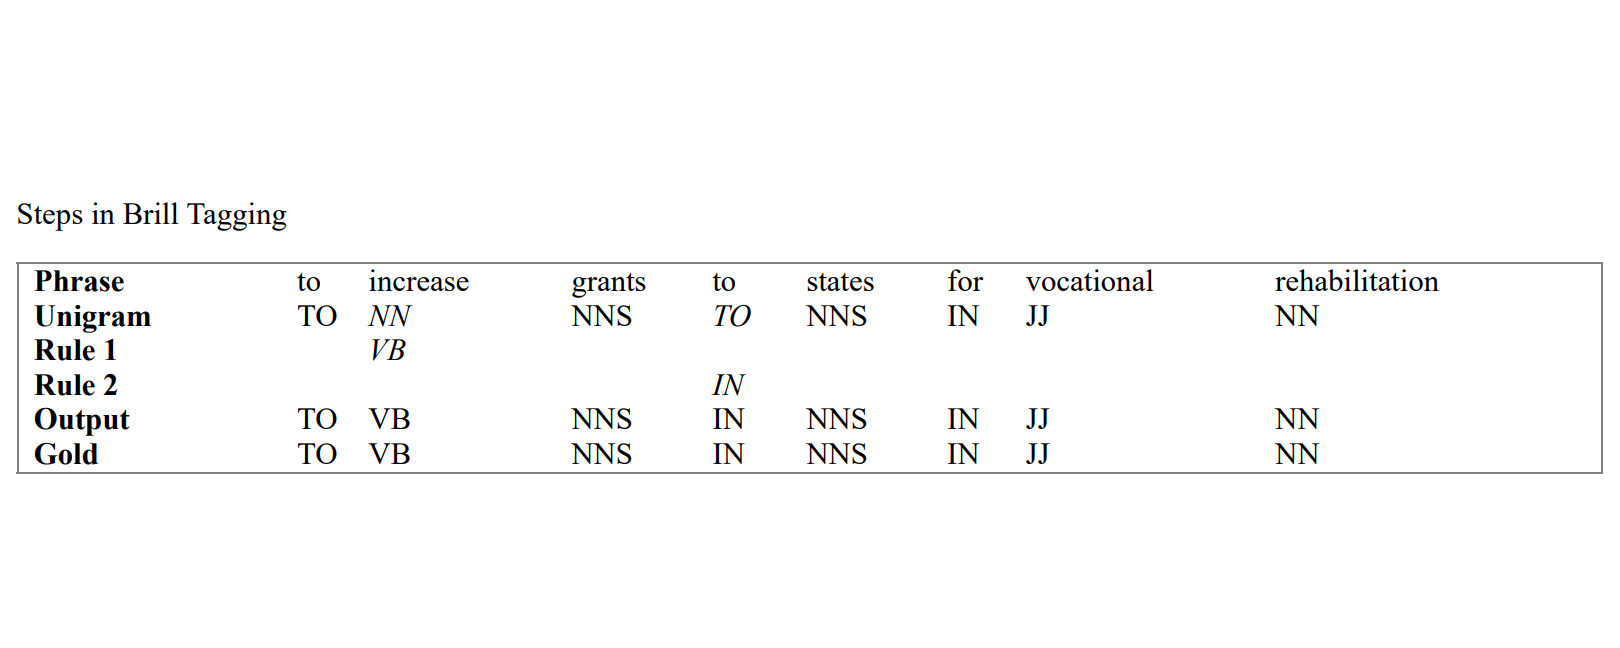

In [11]:
import nltk
from nltk.tag import brill
from nltk.tag import BrillTaggerTrainer

# Sample training data
training_data = [
    [('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'NN'), ('sentence', 'NN')],
    [('Another', 'DT'), ('example', 'NN'), ('for', 'IN'), ('tagging', 'VBG')],
    # Add more training data as needed
]

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(training_data) * split_ratio)
train_data = training_data[:split_index]
test_data = training_data[split_index:]

# Define a Brill tagger trainer with templates
templates = brill.brill24()
trainer = BrillTaggerTrainer(nltk.DefaultTagger('NN'), templates)

# Train the Brill tagger
brill_tagger = trainer.train(train_data)

# Evaluate the tagger on the test data
accuracy = brill_tagger.evaluate(test_data)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Tag a new sentence
new_sentence = "This is a test sentence for tagging."
tagged_sentence = brill_tagger.tag(nltk.word_tokenize(new_sentence))
print(tagged_sentence)


C:\Users\Dr. S Padmaja\AppData\Local\Temp\ipykernel_10448\3643084965.py:26: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = brill_tagger.evaluate(test_data)


Accuracy: 25.00%
[('This', 'DT'), ('is', 'DT'), ('a', 'DT'), ('test', 'DT'), ('sentence', 'DT'), ('for', 'DT'), ('tagging', 'NN'), ('.', 'NN')]


In this example, we use the Brill Tagger Trainer to train a Brill Tagger on a small dataset. The accuracy is then evaluated on a test dataset. Finally, the trained Brill Tagger is used to tag a new sentence.

# 7 How to Determine the Category of a Word

Now that we have examined word classes in detail, we turn to a more basic question: how do we decide what category a word
belongs to in the first place? In general, linguists use morphological, syntactic, and semantic clues to determine the category of a
word.



# 7.1 Morphological Clues
The internal structure of a word may give useful clues as to the word's category. For example, -ness is a suffix that combines
with an adjective to produce a noun, e.g. happy → happiness, ill → illness. So if we encounter a word that ends in -ness, this is
very likely to be a noun. Similarly, -ment is a suffix that combines with some verbs to produce a noun, e.g. govern →
government and establish → establishment.
English verbs can also be morphologically complex. For instance, the present participle of a verb ends in -ing, and expresses
the idea of ongoing, incomplete action (e.g. falling, eating). The -ing suffix also appears on nouns derived from verbs, e.g. the
falling of the leaves (this is known as the gerund).


# 7.2 Syntactic Clues
Another source of information is the typical contexts in which a word can occur. For example, assume that we have already
determined the category of nouns. Then we might say that a syntactic criterion for an adjective in English is that it can occur
immediately before a noun, or immediately following the words be or very. According to these tests, near should be categorized
as an adjective:
    
(2) a. the near window

b. The end is (very) near.

# 7.3 Semantic Clues
Finally, the meaning of a word is a useful clue as to its lexical category. For example, the best-known definition of a noun is
semantic: "the name of a person, place or thing". Within modern linguistics, semantic criteria for word classes are treated with
suspicion, mainly because they are hard to formalize. Nevertheless, semantic criteria underpin many of our intuitions about
word classes, and enable us to make a good guess about the categorization of words in languages that we are unfamiliar with.
For example, if all we know about the Dutch word verjaardag is that it means the same as the English word birthday, then we
can guess that verjaardag is a noun in Dutch. However, some care is needed: although we might translate zij is vandaag jarig as
it's her birthday today, the word jarig is in fact an adjective in Dutch, and has no exact equivalent in English.

# 7.4 New Words
All languages acquire new lexical items. A list of words recently added to the Oxford Dictionary of English includes
cyberslacker, fatoush, blamestorm, SARS, cantopop, bupkis, noughties, muggle, and robata. Notice that all these new words are
nouns, and this is reflected in calling nouns an open class. By contrast, prepositions are regarded as a closed class. That is, there
is a limited set of words belonging to the class (e.g., above, along, at, below, beside, between, during, for, from, in, near, on,
outside, over, past, through, towards, under, up, with), and membership of the set only changes very gradually over time.


# 7.5 Morphology in Part of Speech Tagsets
Common tagsets often capture some morpho-syntactic information; that is, information about the kind of morphological
markings that words receive by virtue of their syntactic role. Consider, for example, the selection of distinct grammatical forms
of the word go illustrated in the following sentences:
    
(3) a. Go away!

b. He sometimes goes to the cafe.

c. All the cakes have gone.

d. We went on the excursion.

Each of these forms — go, goes, gone, and went — is morphologically distinct from the others. Consider the form, goes. This
occurs in a restricted set of grammatical contexts, and requires a third person singular subject. Thus, the following sentences are
ungrammatical.

(4) a. *They sometimes goes to the cafe.

b. *I sometimes goes to the cafe.

By contrast, gone is the past participle form; it is required after have (and cannot be replaced in this context by goes), and
cannot occur as the main verb of a clause.

(5) a. *All the cakes have goes.

b. *He sometimes gone to the cafe.

We can easily imagine a tagset in which the four distinct grammatical forms just discussed were all tagged as VB. Although this
would be adequate for some purposes, a more fine-grained tagset provides useful information about these forms that can help
other processors that try to detect patterns in tag sequences. The Brown tagset captures these distinctions, as summarized below:

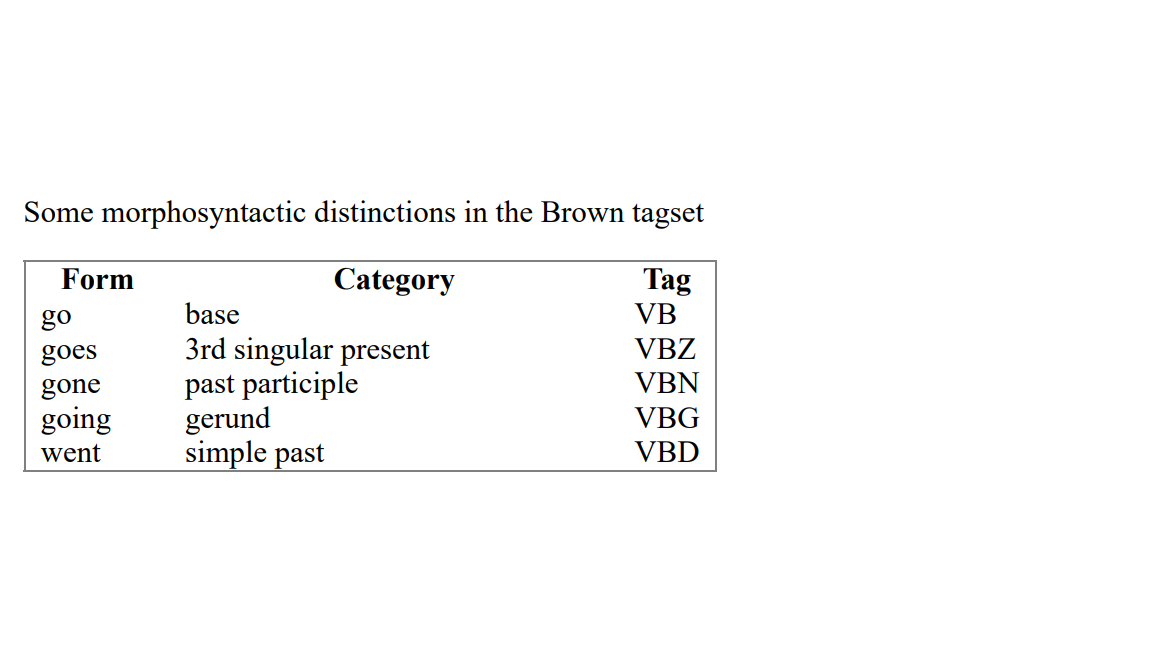


In addition to this set of verb tags, the various forms of the verb to be have special tags:
be/BE, being/BEG, am/BEM, are/BER, is/BEZ, been/BEN, were/BED and was/BEDZ (plus extra tags for negative forms of the
verb). All told, this fine-grained tagging of verbs means that an automatic tagger that uses this tagset is effectively carrying out a
limited amount of morphological analysis.

Most part-of-speech tagsets make use of the same basic categories, such as noun, verb, adjective, and preposition. However,
tagsets differ both in how finely they divide words into categories, and in how they define their categories. For example, is
might be tagged simply as a verb in one tagset; but as a distinct form of the lexeme be in another tagset (as in the Brown
Corpus). This variation in tagsets is unavoidable, since part-of-speech tags are used in different ways for different tasks. 